In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt,ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
gold_data = pd.read_csv('Gold_data.csv', index_col=0, parse_dates=True, squeeze=True)

In [ ]:
gold_data.head()

date
2016-01-01    2252.60
2016-01-02    2454.50
2016-01-03    2708.10
2016-01-04    2577.80
2016-01-05    2597.75
Name: price, dtype: float64

In [ ]:
type(gold_data)

pandas.core.series.Series

In [ ]:
gold_data.dtypes

dtype('float64')

In [ ]:
type(gold_data.index)

pandas.core.indexes.datetimes.DatetimeIndex

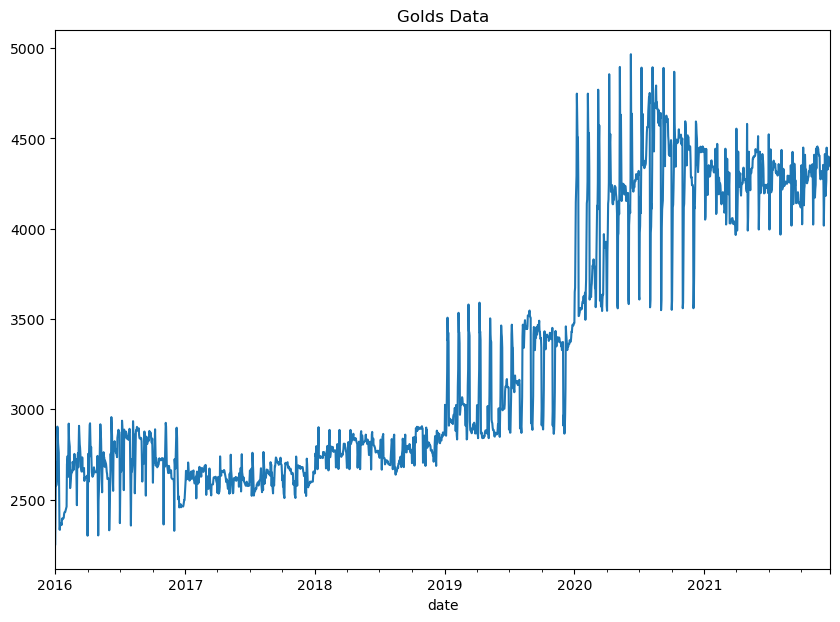

In [ ]:
plt.figure(figsize=(10,7))
gold_data.plot()
plt.title('Golds Data')
plt.show()

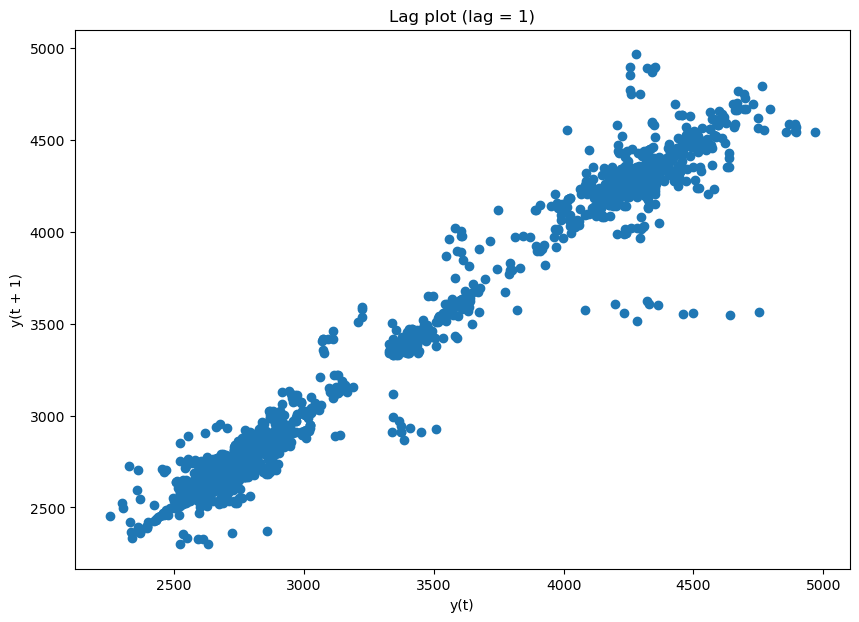

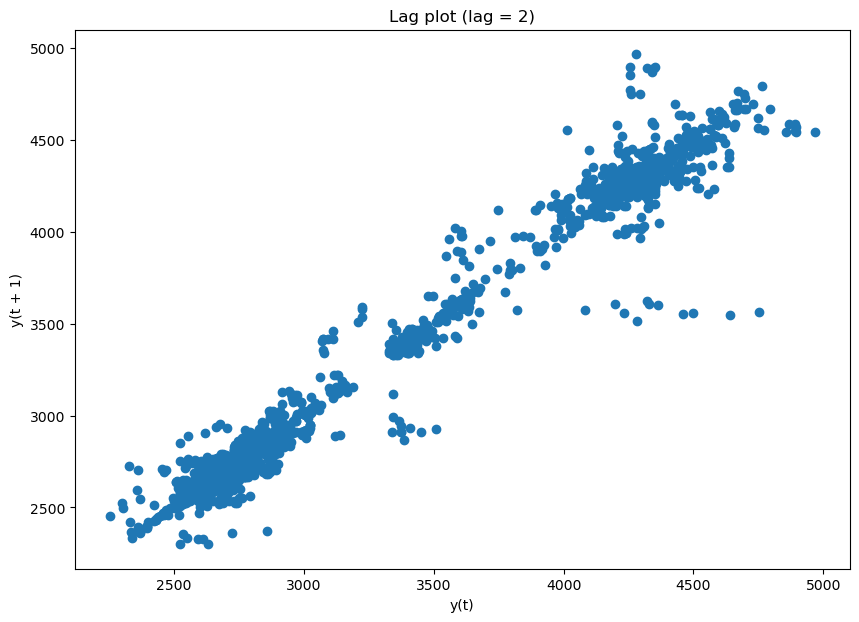

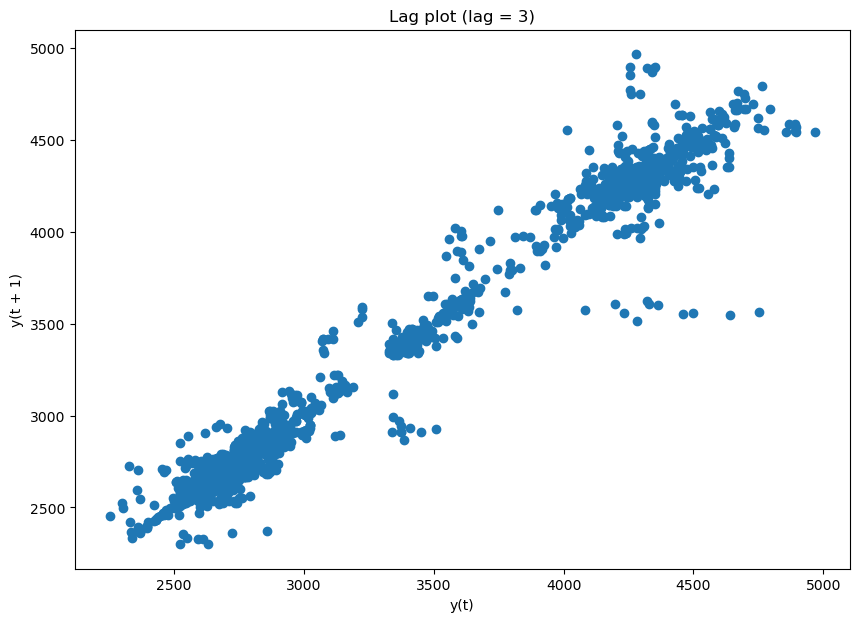

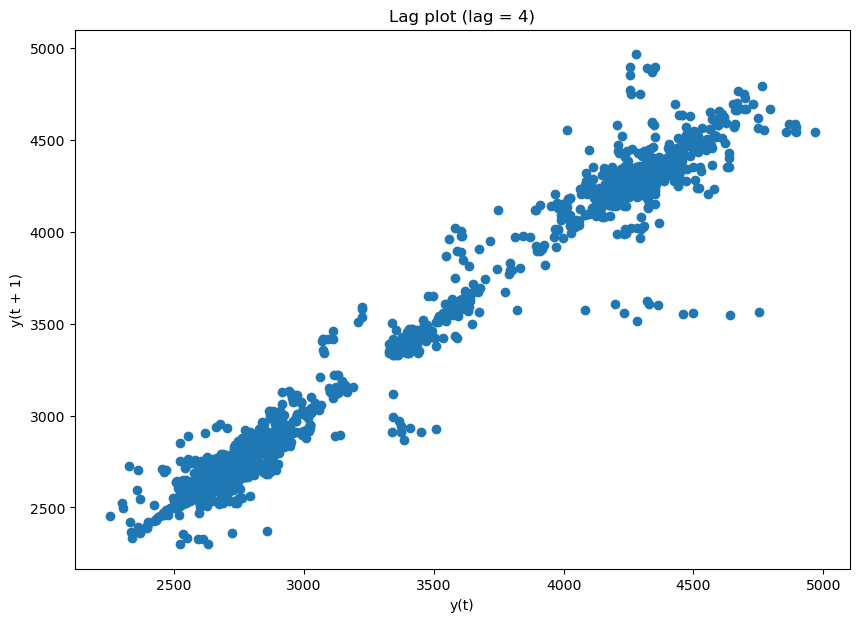

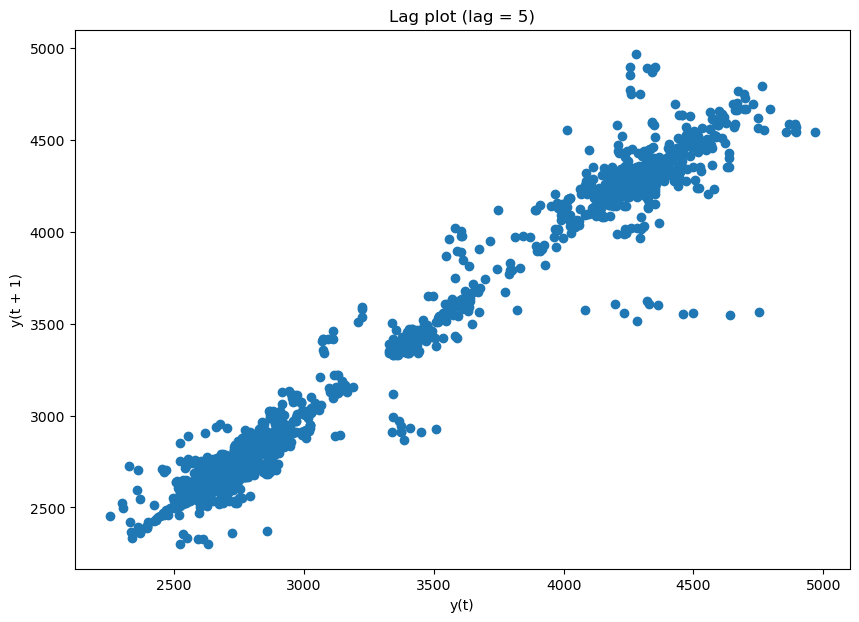

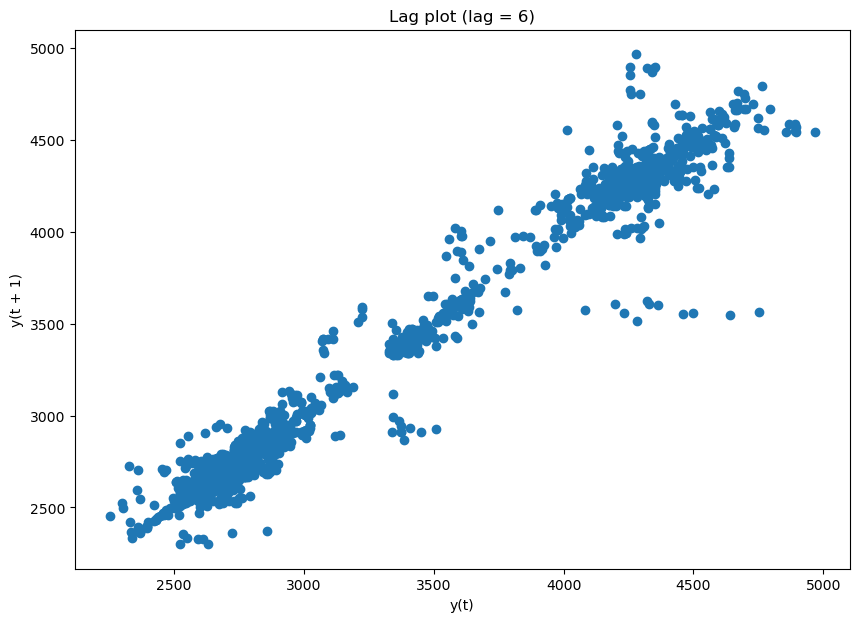

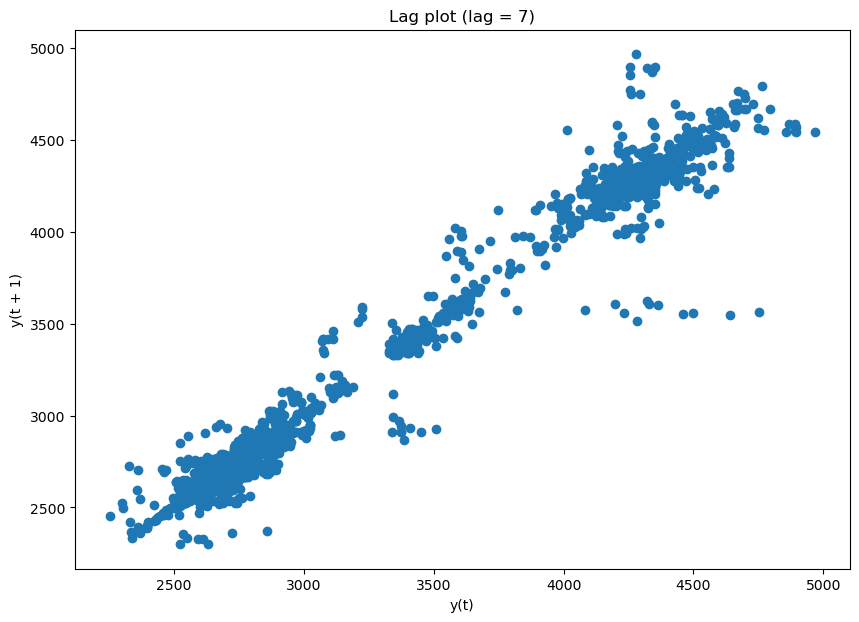

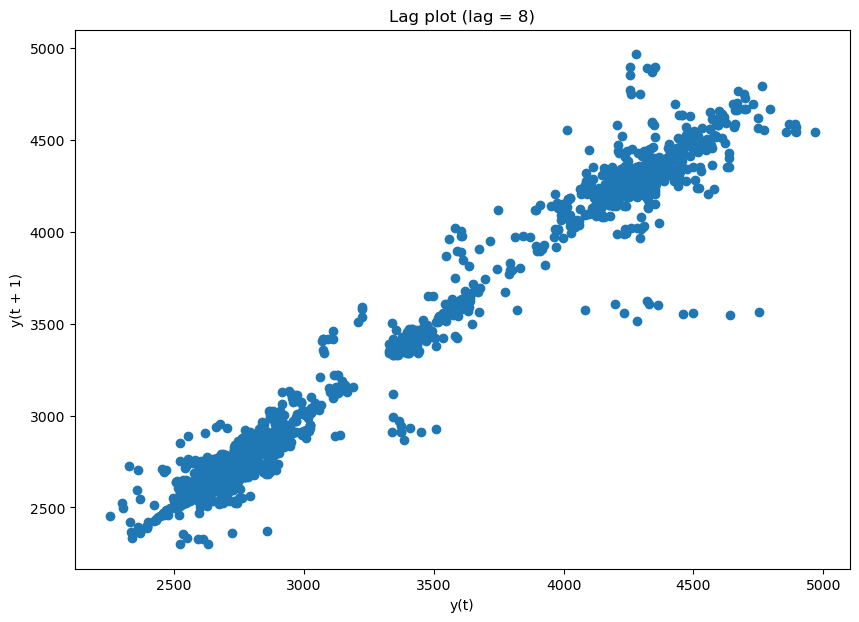

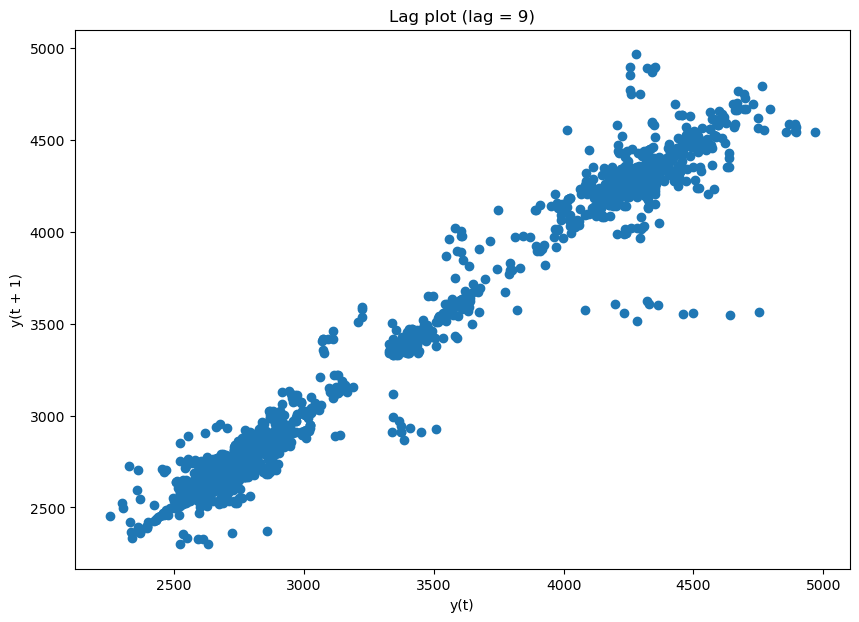

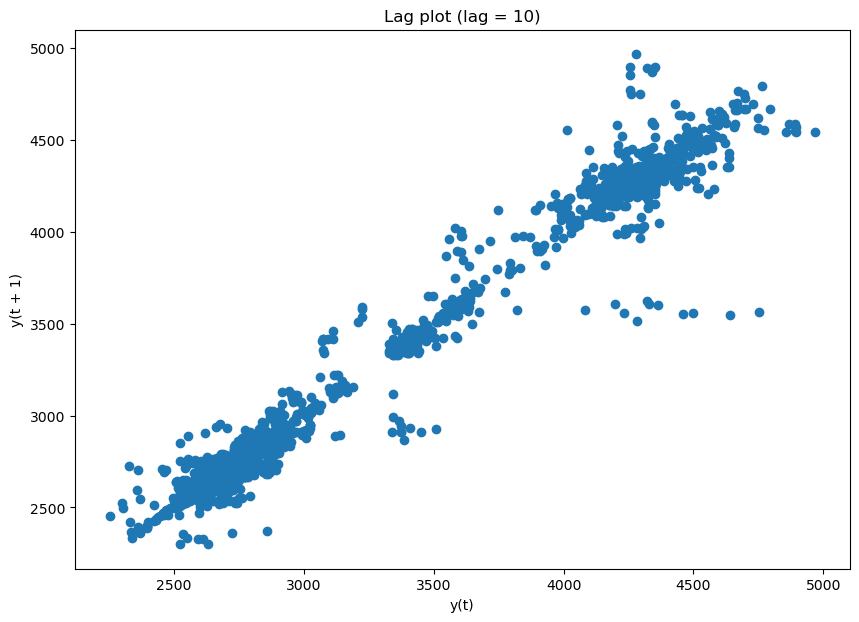

In [ ]:
for i in range(1,11):
    plt.figure(figsize=(10,7))
    pd.plotting.lag_plot(gold_data, lag=1)
    plt.title('Lag plot (lag = {})'.format(i))
    plt.show()

In [ ]:
data_1 = pd.DataFrame(gold_data)
data_1

price
date               
2016-01-01  2252.60
2016-01-02  2454.50
2016-01-03  2708.10
2016-01-04  2577.80
2016-01-05  2597.75
...             ...
2021-12-17  4394.40
2021-12-18  4389.50
2021-12-19  4389.50
2021-12-20  4354.10
2021-12-21  4346.50

[2182 rows x 1 columns]

In [ ]:
data_1

price
date               
2016-01-01  2252.60
2016-01-02  2454.50
2016-01-03  2708.10
2016-01-04  2577.80
2016-01-05  2597.75
...             ...
2021-12-17  4394.40
2021-12-18  4389.50
2021-12-19  4389.50
2021-12-20  4354.10
2021-12-21  4346.50

[2182 rows x 1 columns]

In [ ]:
data_1['Dummpy_time'] = np.arange(len(data_1))

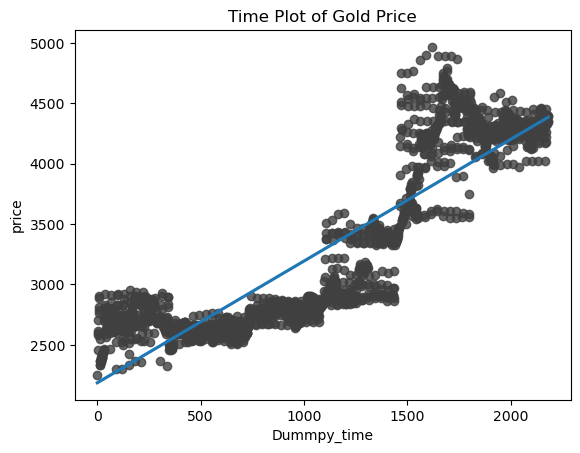

In [ ]:
ax = plt.subplots()
ax = sns.regplot(x='Dummpy_time', y='price', data=data_1, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Gold Price');
ax.tick_params(labelsize=10)
plt.show()

In [ ]:
for i in range(1,11):
    data_1['lag_{}'.format(i)] = data_1['price'].shift(i)
data_1

price  Dummpy_time   lag_1   lag_2   lag_3   lag_4   lag_5  \
date                                                                       
2016-01-01  2252.60            0     NaN     NaN     NaN     NaN     NaN   
2016-01-02  2454.50            1  2252.6     NaN     NaN     NaN     NaN   
2016-01-03  2708.10            2  2454.5  2252.6     NaN     NaN     NaN   
2016-01-04  2577.80            3  2708.1  2454.5  2252.6     NaN     NaN   
2016-01-05  2597.75            4  2577.8  2708.1  2454.5  2252.6     NaN   
...             ...          ...     ...     ...     ...     ...     ...   
2021-12-17  4394.40         2177  4399.8  4348.7  4328.2  4351.4  4333.5   
2021-12-18  4389.50         2178  4394.4  4399.8  4348.7  4328.2  4351.4   
2021-12-19  4389.50         2179  4389.5  4394.4  4399.8  4348.7  4328.2   
2021-12-20  4354.10         2180  4389.5  4389.5  4394.4  4399.8  4348.7   
2021-12-21  4346.50         2181  4354.1  4389.5  4389.5  4394.4  4399.8   

             lag_6   lag_7   lag_8   lag_9  lag_10  
date                                                
2016-01-01     NaN     NaN     NaN     NaN     NaN  
2016-01-02     NaN     NaN     NaN     NaN     NaN  
2016-01-03     NaN     NaN     NaN     NaN     NaN  
2016-01-04     NaN     NaN     NaN     NaN     NaN  
2016-01-05     NaN     NaN     NaN     NaN     NaN  
...            ...     ...     ...     ...     ...  
2021-12-17  4448.9  4264.7  4219.4  4181.5  4319.4  
2021-12-18  4333.5  4448.9  4264.7  4219.4  4181.5  
2021-12-19  4351.4  4333.5  4448.9  4264.7  4219.4  
2021-12-20  4328.2  4351.4  4333.5  4448.9  4264.7  
2021-12-21  4348.7  4328.2  4351.4  4333.5  4448.9  

[2182 rows x 12 columns]

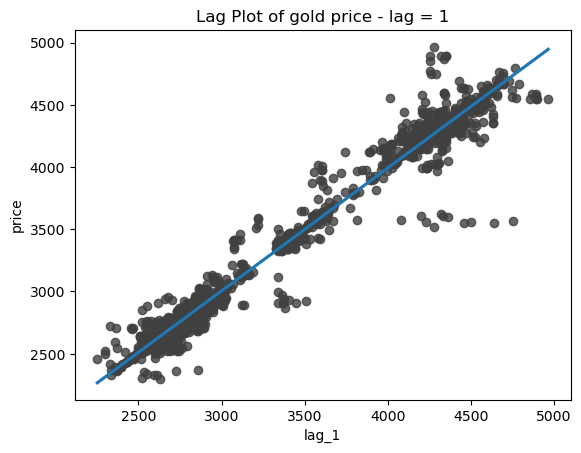

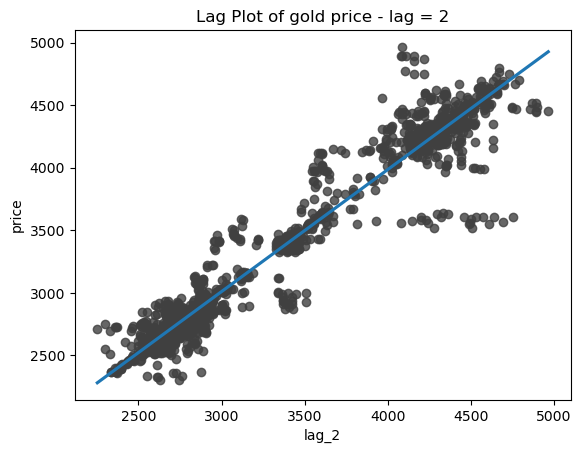

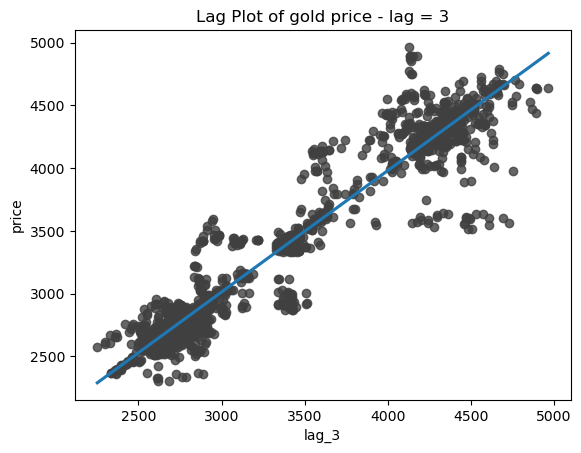

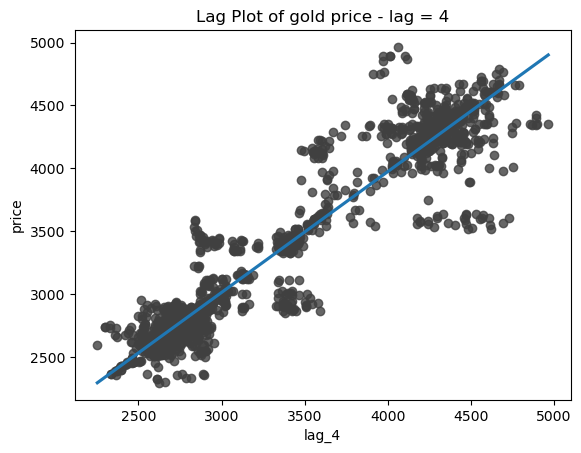

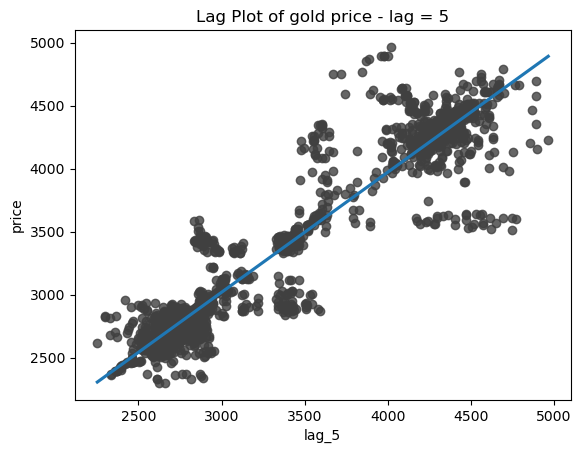

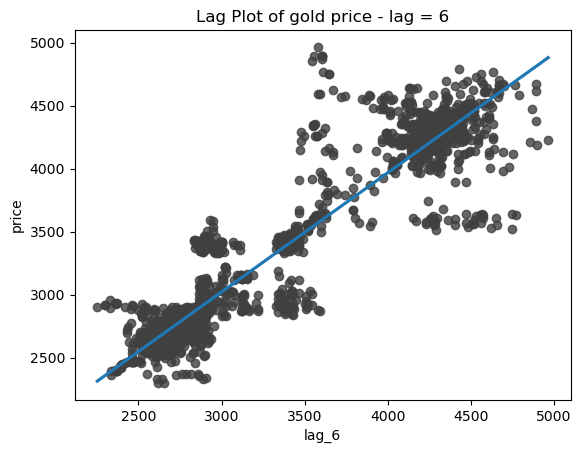

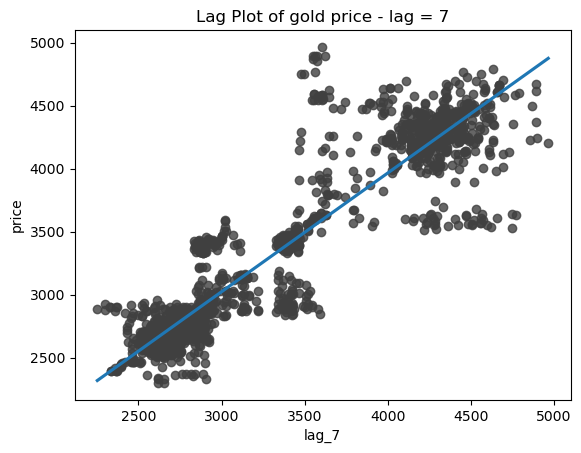

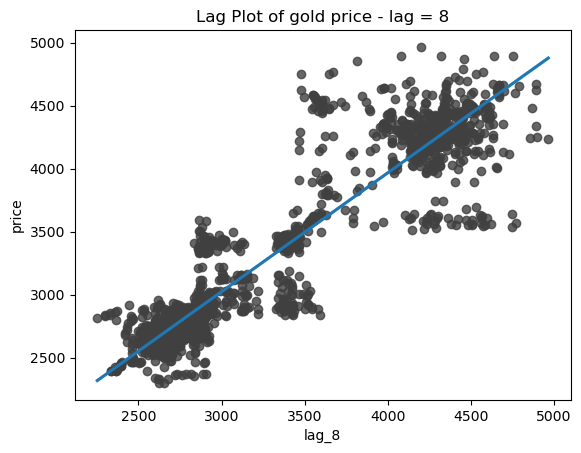

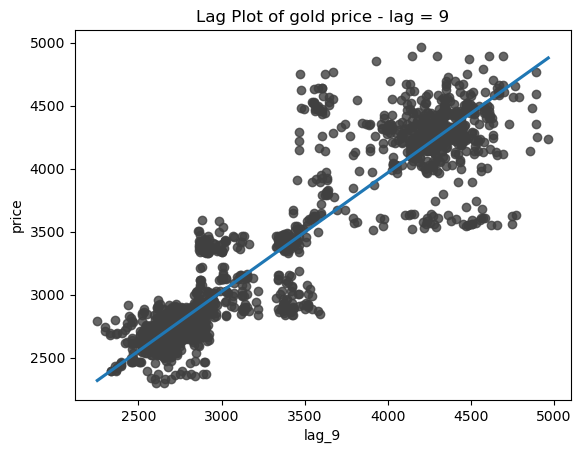

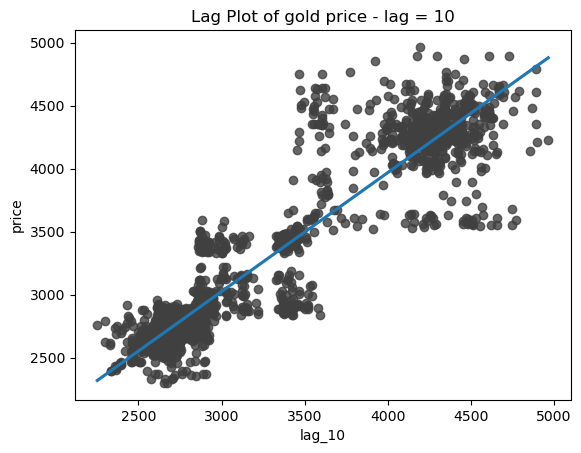

In [ ]:
fig, ax = plt.subplots()

for i in range(1,11):
    ax = sns.regplot(x='lag_{}'.format(i), y='price', data=data_1, ci=None, scatter_kws=dict(color='0.25'),)
    ax.set_title('Lag Plot of gold price - lag = {}'.format(i));
    plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
data_1 = data_1.iloc[:,0:3]

In [ ]:
data_1.drop('lag_1', axis=1, inplace= True)

In [ ]:
data_1.shape[0] - 545

1637

In [ ]:
train = data_1.iloc[:1637, :]
test = data_1.iloc[1637:,:]

In [ ]:
lin_model = lin_model.fit(train[['Dummpy_time']], train[['price']])

In [ ]:
lin_model.coef_

array([[0.73175053]])

In [ ]:
lin_model.intercept_

array([2345.23759904])

In [ ]:
test_pred = lin_model.predict(test[['Dummpy_time']])

In [ ]:
test_pred = pd.Series(test_pred.flatten(), index=test.index)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [ ]:
MAPE(test['price'], test_pred)

0.12961002019283657

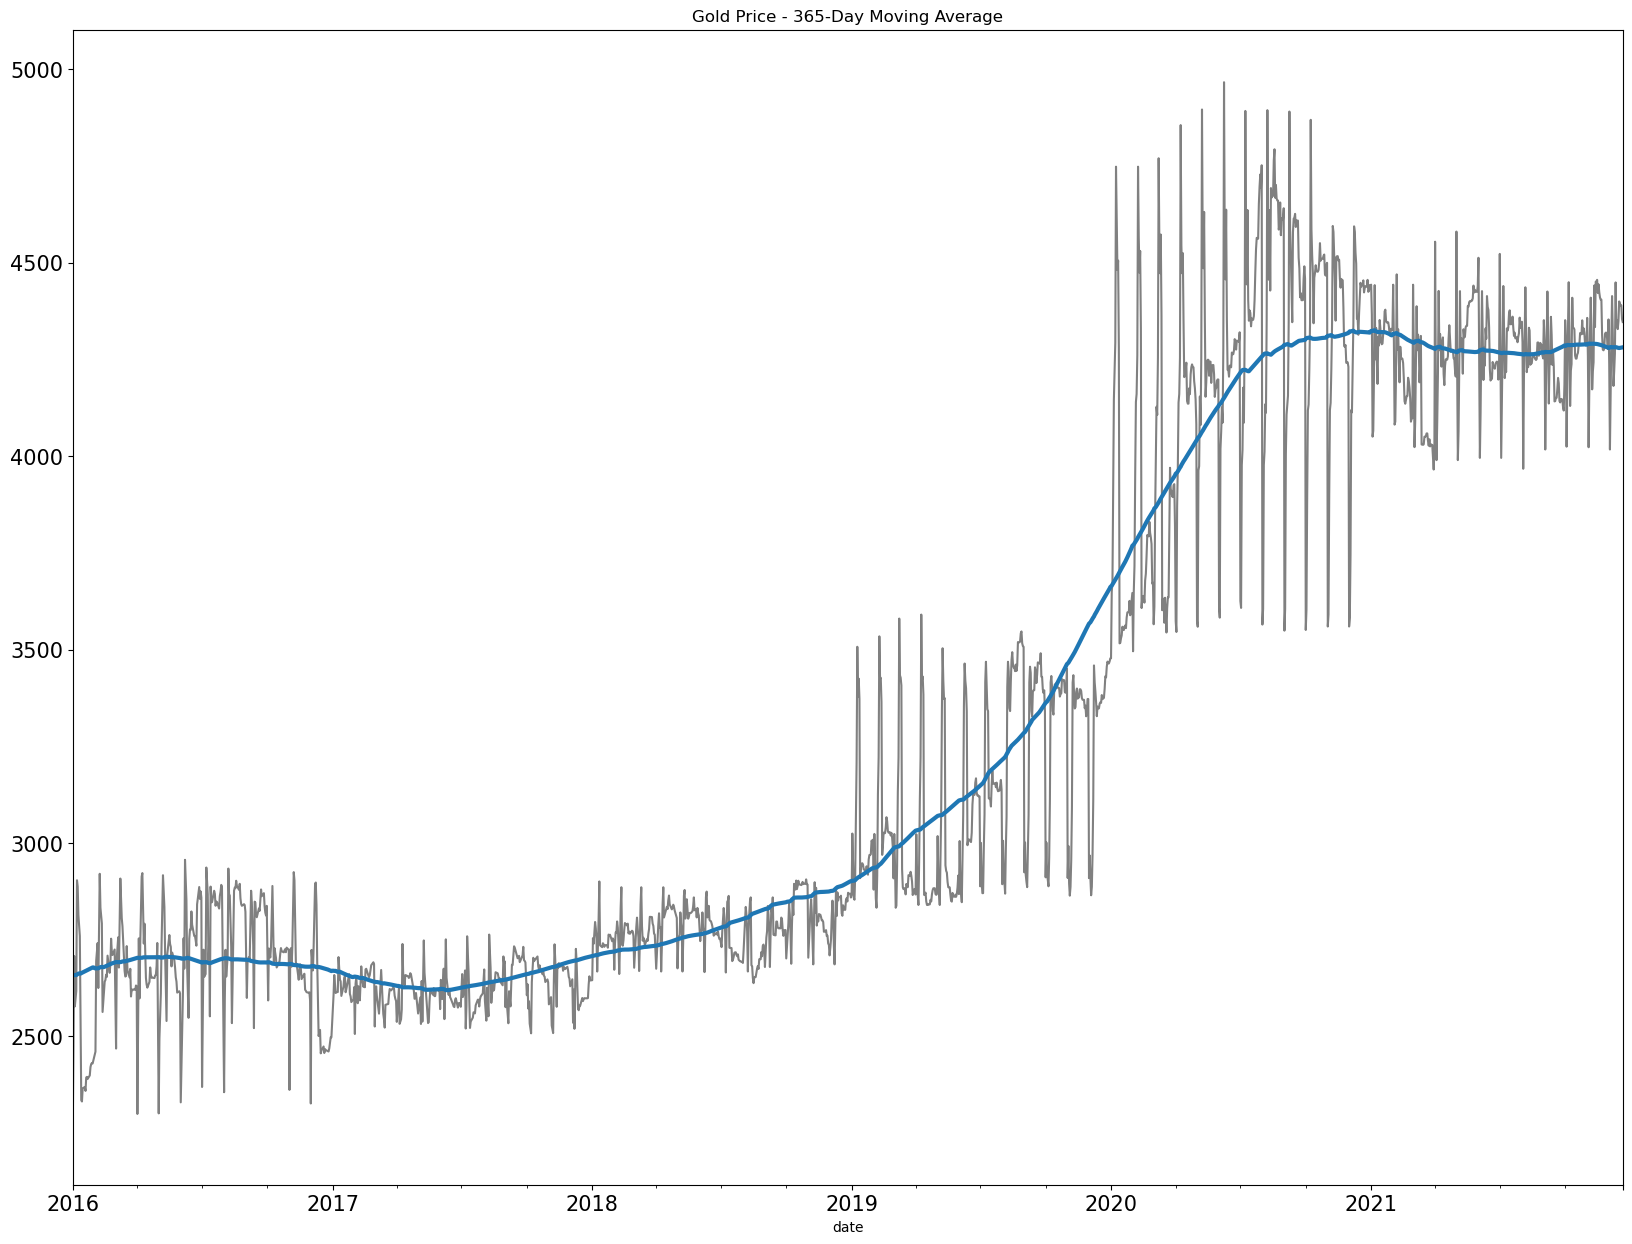

In [ ]:
moving_average = gold_data.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
    ).mean()          # compute the mean (could also do median, std, min, max, ...)


plt.figure(figsize=(20,15))
ax = gold_data.plot(style="-", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Gold Price - 365-Day Moving Average", legend=False,fontsize=15);

In [ ]:
moving_average

date
2016-01-01    2658.961475
2016-01-02    2658.352446
2016-01-03    2658.708919
2016-01-04    2658.685215
2016-01-05    2658.681016
                 ...     
2021-12-17    4279.592513
2021-12-18    4280.045699
2021-12-19    4280.480000
2021-12-20    4280.919022
2021-12-21    4281.125137
Name: price, Length: 2182, dtype: float64

In [ ]:
gold_data

date
2016-01-01    2252.60
2016-01-02    2454.50
2016-01-03    2708.10
2016-01-04    2577.80
2016-01-05    2597.75
               ...   
2021-12-17    4394.40
2021-12-18    4389.50
2021-12-19    4389.50
2021-12-20    4354.10
2021-12-21    4346.50
Name: price, Length: 2182, dtype: float64

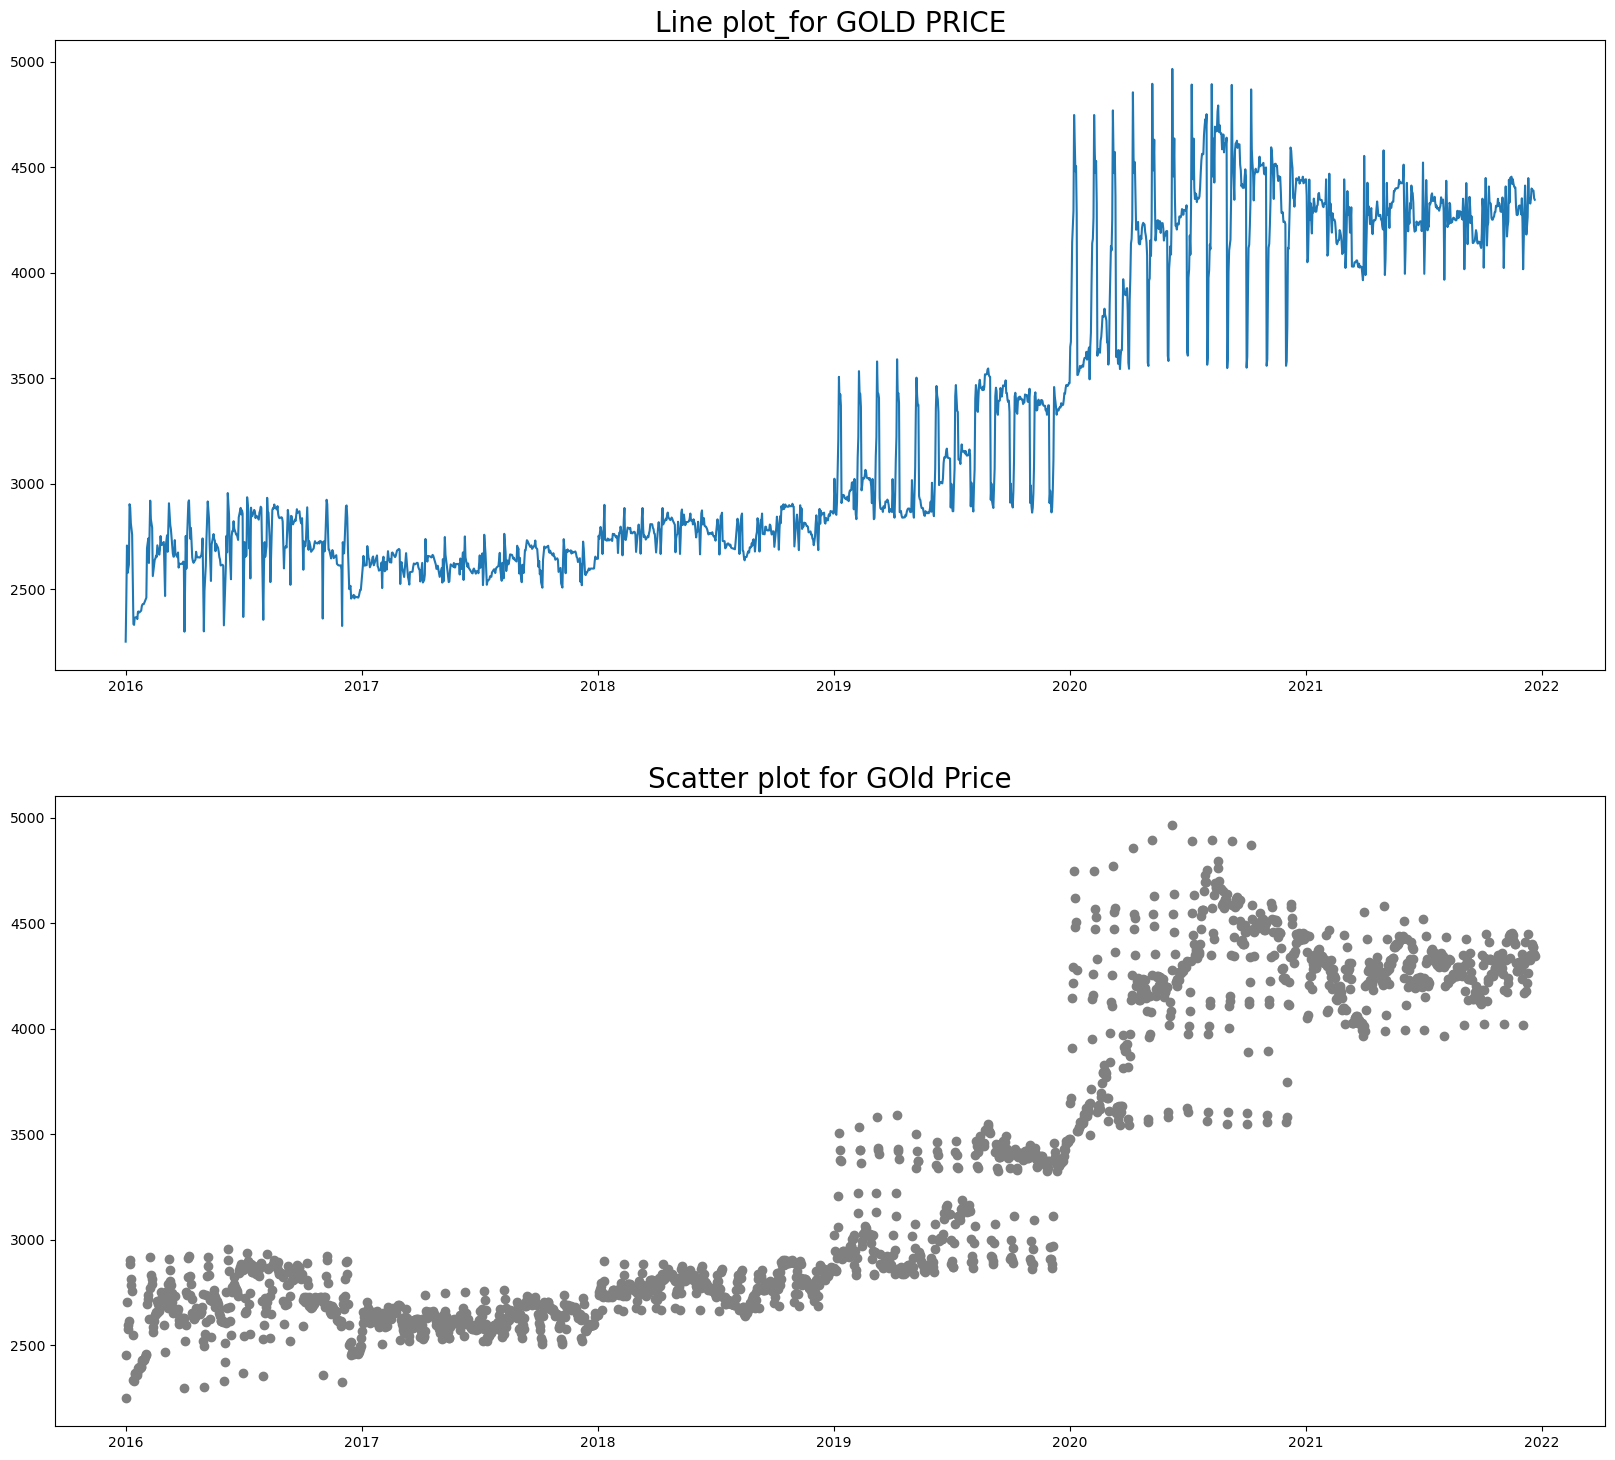

In [ ]:
fig = plt.figure()
fig.set_figheight(18)
fig.set_figwidth(20)
ax0 = fig.add_subplot(2,1,1)
ax0.plot(gold_data)
ax0.set_title('Line plot_for GOLD PRICE',fontsize = 20)
ax1 = fig.add_subplot(2,1,2)
ax1.scatter(gold_data.index,gold_data,color='grey')
ax1.set_title('Scatter plot for GOld Price', fontsize = 20)
plt.show()

### Moving Average

In [ ]:
data_2 = gold_data.to_frame()
data_2

price
date               
2016-01-01  2252.60
2016-01-02  2454.50
2016-01-03  2708.10
2016-01-04  2577.80
2016-01-05  2597.75
...             ...
2021-12-17  4394.40
2021-12-18  4389.50
2021-12-19  4389.50
2021-12-20  4354.10
2021-12-21  4346.50

[2182 rows x 1 columns]

In [ ]:
data_2.rolling(365,center=True, min_periods=183).mean()

price
date                   
2016-01-01  2658.961475
2016-01-02  2658.352446
2016-01-03  2658.708919
2016-01-04  2658.685215
2016-01-05  2658.681016
...                 ...
2021-12-17  4279.592513
2021-12-18  4280.045699
2021-12-19  4280.480000
2021-12-20  4280.919022
2021-12-21  4281.125137

[2182 rows x 1 columns]

In [ ]:
data_2.expanding().mean()

price
date                   
2016-01-01  2252.600000
2016-01-02  2353.550000
2016-01-03  2471.733333
2016-01-04  2498.250000
2016-01-05  2518.150000
...                 ...
2021-12-17  3282.456566
2021-12-18  3282.964617
2021-12-19  3283.472202
2021-12-20  3283.963090
2021-12-21  3284.450046

[2182 rows x 1 columns]

In [ ]:
data_2.ewm(365).mean()

price
date                   
2016-01-01  2252.600000
2016-01-02  2353.688098
2016-01-03  2472.148767
2016-01-04  2498.670071
2016-01-05  2518.594638
...                 ...
2021-12-17  4097.691111
2021-12-18  4098.490462
2021-12-19  4099.287618
2021-12-20  4099.985614
2021-12-21  4100.660876

[2182 rows x 1 columns]

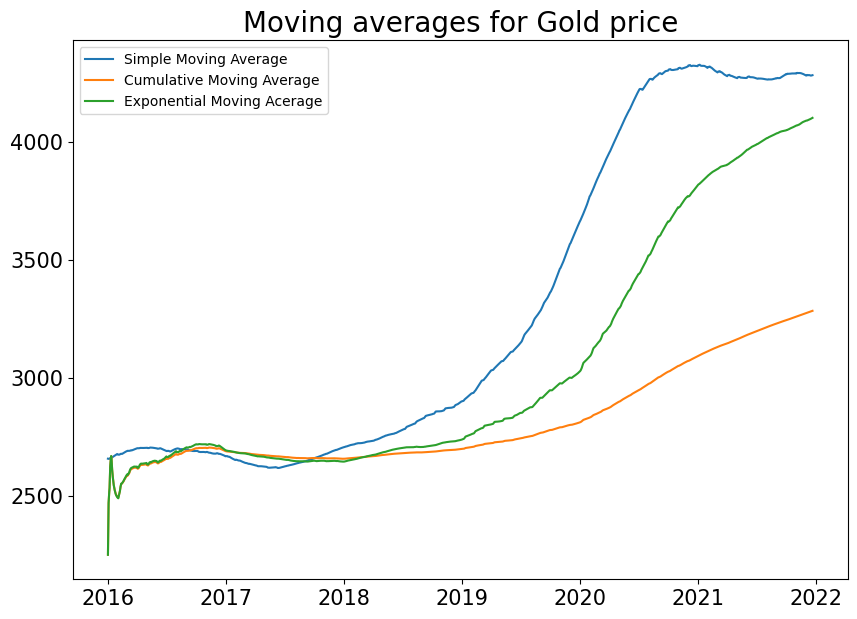

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(data_2.rolling(365,center=True, min_periods=183).mean())
plt.plot(data_2.expanding().mean())
plt.plot(data_2.ewm(365).mean())
plt.title('Moving averages for Gold price', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.legend(['Simple Moving Average','Cumulative Moving Average', 'Exponential Moving Acerage'])
plt.show()

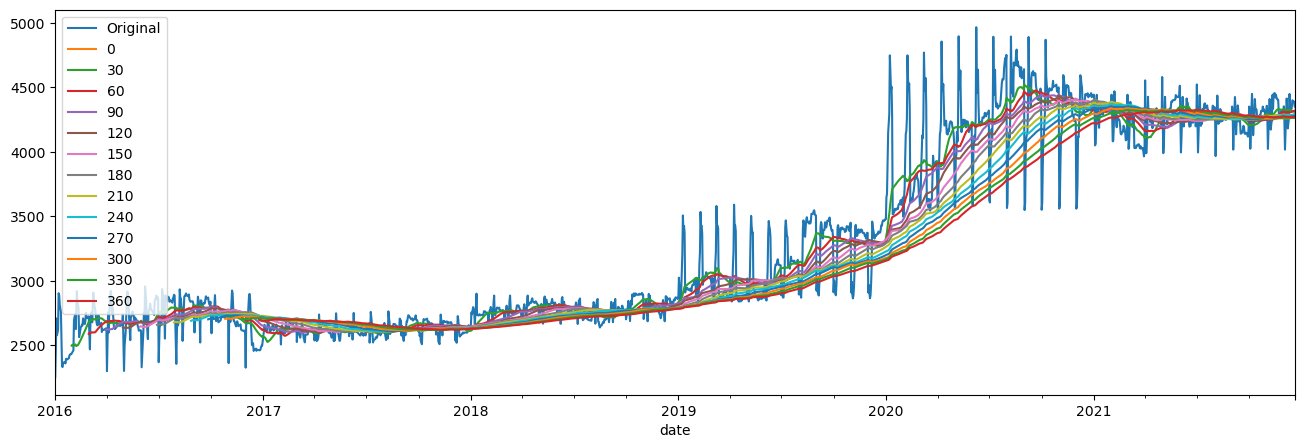

In [ ]:
plt.figure(figsize=(16,5))
gold_data.plot(label='Original')
for i in range(0,370,30):
    gold_data.rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

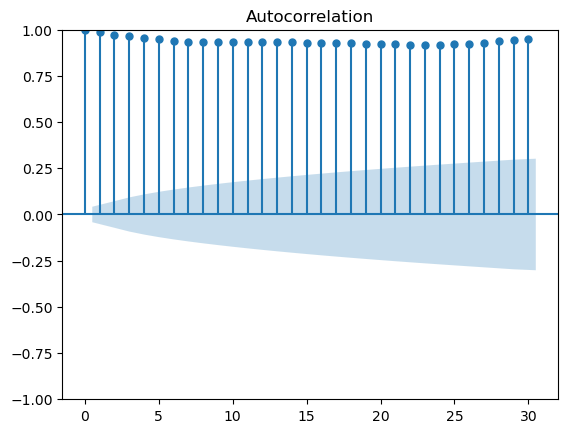

In [ ]:
plot_acf(gold_data.values,lags=30)
plt.show()

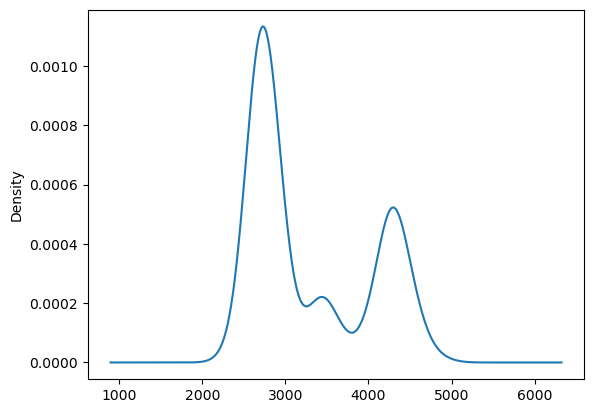

In [ ]:
gold_data.plot(kind='kde')
plt.show()

In [ ]:
from pandas import Grouper
from pandas import DataFrame

In [ ]:
groups = gold_data.groupby(Grouper(freq='A'))
years = DataFrame()
for name, groups in groups:
    years[name.year] = pd.Series(groups.values.flatten())

In [ ]:
years

2016         2017    2018    2019    2020    2021
0    2252.600000  2570.266667  2645.5  2865.8  3477.6  4443.1
1    2454.500000  2606.500000  2754.1  3024.5  3649.3  4365.3
2    2708.100000  2658.800000  2739.7  2948.5  3672.8  4050.3
3    2577.800000  2635.600000  2767.8  2858.7  3909.0  4065.8
4    2597.750000  2612.400000  2795.9  2853.4  4145.9  4207.6
..           ...          ...     ...     ...     ...     ...
361  2469.300000  2655.500000  2869.0  3464.2  4455.5     NaN
362  2484.300000  2644.800000  2869.0  3464.2  4424.6     NaN
363  2498.100000  2645.033333  2869.0  3469.4  4427.6     NaN
364  2497.800000  2645.266667  2859.1  3477.3  4441.9     NaN
365  2534.033333          NaN     NaN     NaN  4440.4     NaN

[366 rows x 6 columns]

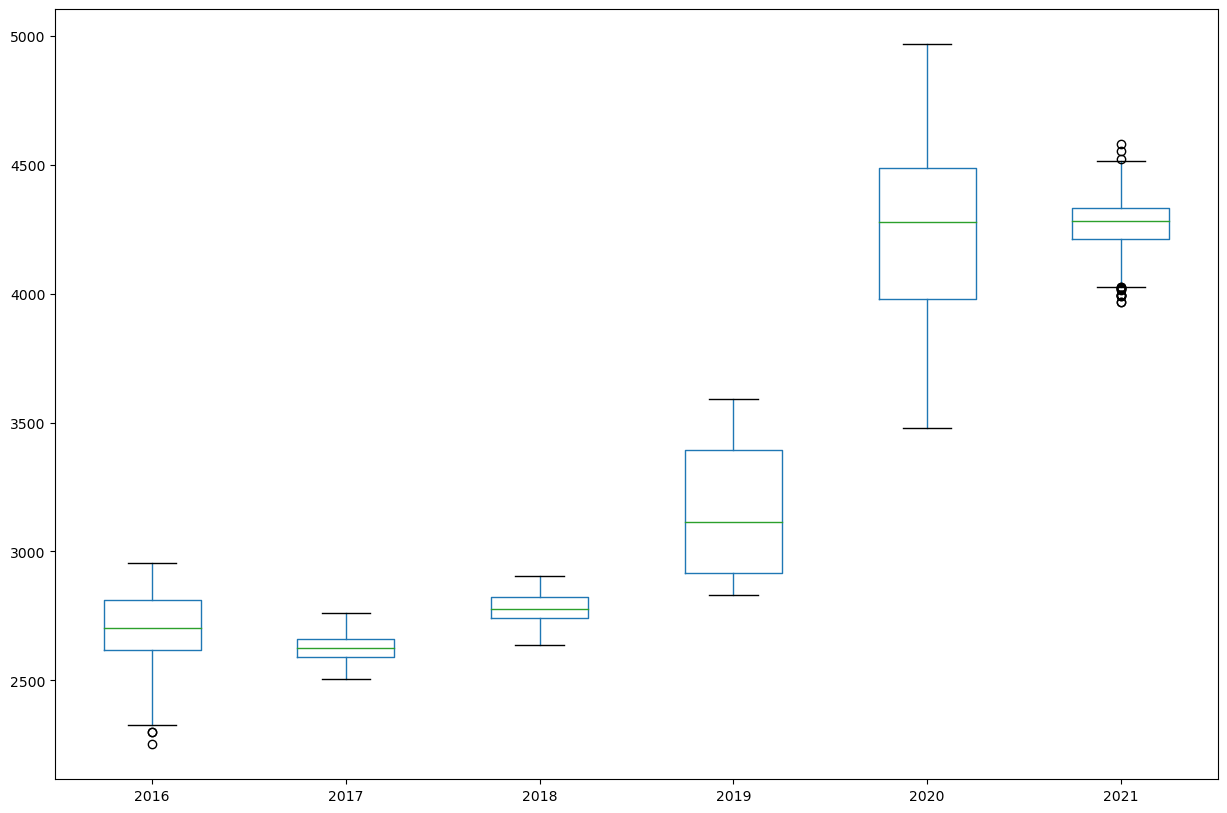

In [ ]:
plt.figure(figsize=(15,10))
years.boxplot(grid=False)
plt.show()

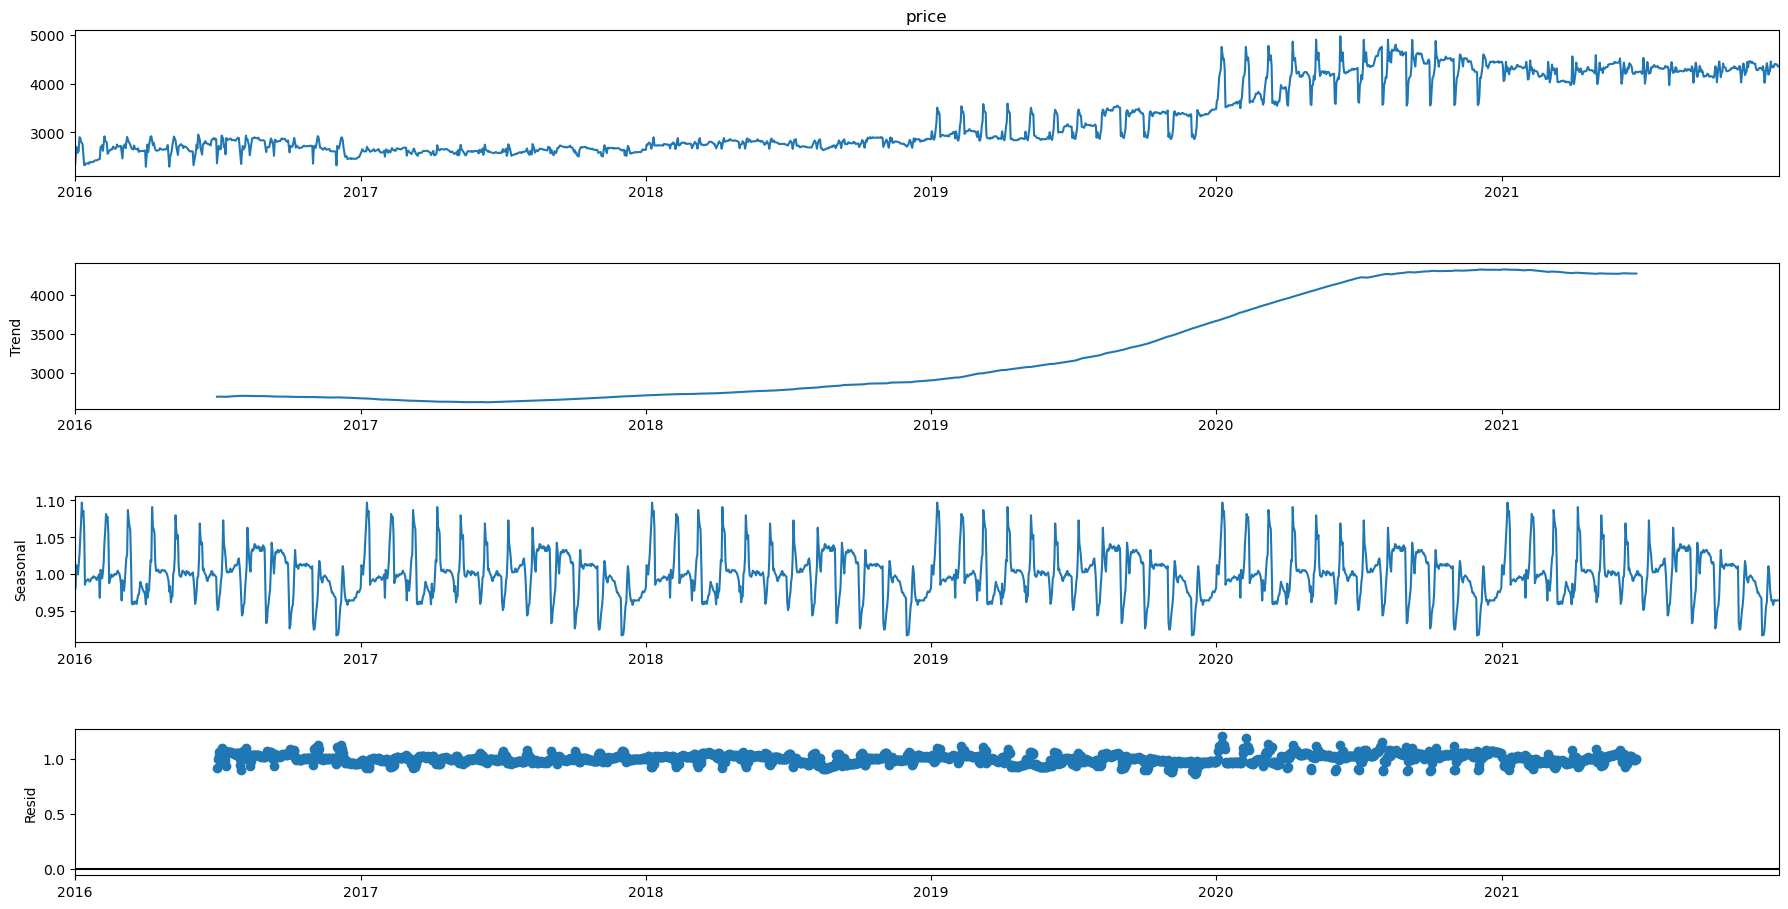

In [ ]:
ax0 = seasonal_decompose(data_1['price'], model='multiplicative', period=365).plot()
ax0.set_figheight(10)
ax0.set_figwidth(20)

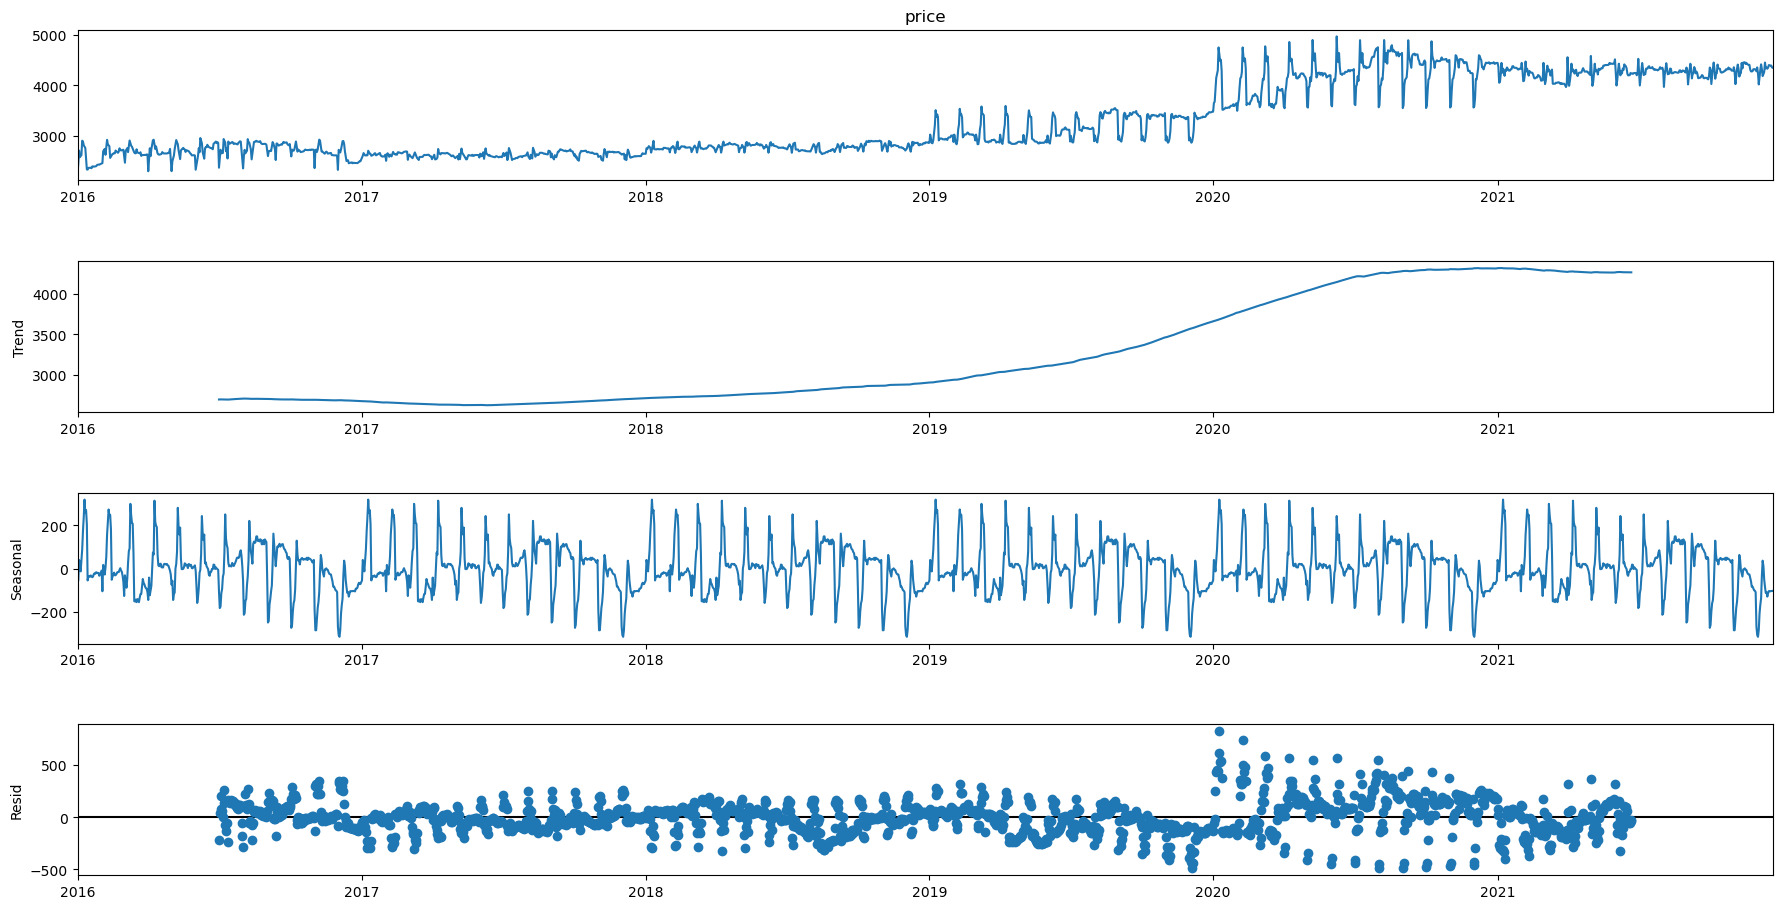

In [ ]:
ax1 = seasonal_decompose(data_1['price'], model='additive', period=365).plot()
ax1.set_figheight(10)
ax1.set_figwidth(20)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

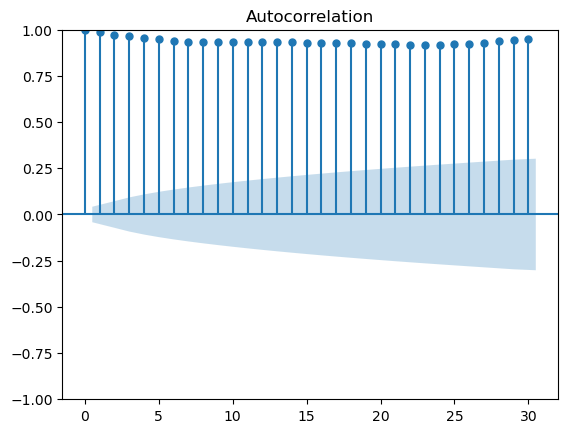

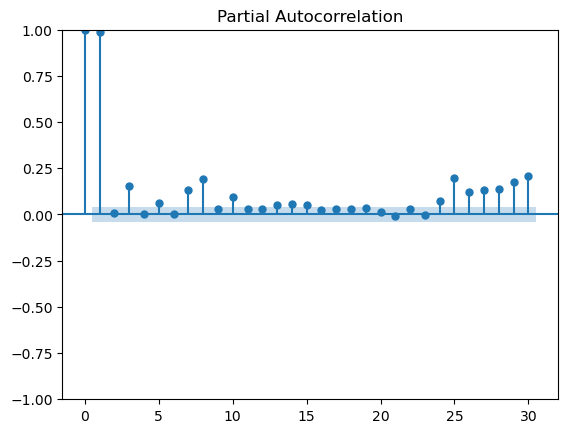

In [ ]:
x = plot_acf(gold_data,lags=30)
y = plot_pacf(gold_data,lags=30)

### Evalution Metrics

In [ ]:
def MAPE(pred, org):
    temp = np.abs((pred-org)/org) *100
    return np.mean(temp)

In [ ]:
data_1

price  Dummpy_time
date                            
2016-01-01  2252.60            0
2016-01-02  2454.50            1
2016-01-03  2708.10            2
2016-01-04  2577.80            3
2016-01-05  2597.75            4
...             ...          ...
2021-12-17  4394.40         2177
2021-12-18  4389.50         2178
2021-12-19  4389.50         2179
2021-12-20  4354.10         2180
2021-12-21  4346.50         2181

[2182 rows x 2 columns]

### Splitting Data

In [ ]:
train_data = data_1.head(1745)
test_data = data_1.tail(437)

### Simple Exponential Method

In [ ]:
ses_model = SimpleExpSmoothing(train_data['price']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start=test_data['Dummpy_time'][0], end=test_data['Dummpy_time'][-1])
MAPE(pred_ses, test_data['price'])

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


3.381082799589895

In [ ]:
ses_model_result = pd.DataFrame(columns=['Smoothing_Level','MAPE'])
for i in np.arange(0.1, 1, 0.1):
    ses_model = SimpleExpSmoothing(train_data['price']).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start=test_data['Dummpy_time'][0], end=test_data['Dummpy_time'][-1])
    res = MAPE(pred_ses, test_data['price'])
    ses_model_result.loc[len(ses_model_result)] = [i, res]

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

In [ ]:
ses_model_result.sort_values(by='MAPE')

Smoothing_Level      MAPE
0              0.1  2.852817
1              0.2  3.381083
2              0.3  4.534337
3              0.4  5.607609
8              0.9  5.840060
7              0.8  6.095812
4              0.5  6.217297
6              0.7  6.317451
5              0.6  6.401912

2.852816938329612 	--> smoothing_level: 0.1


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


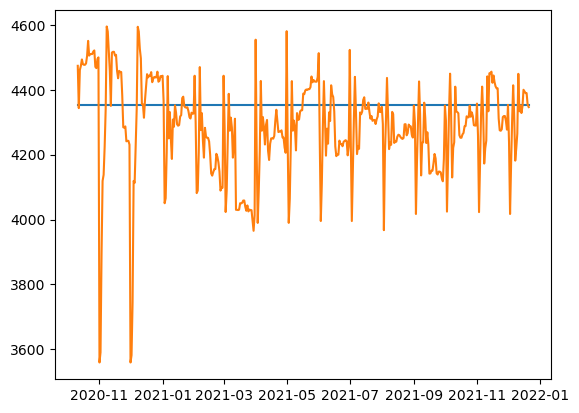

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


3.381082799589895 	--> smoothing_level: 0.2


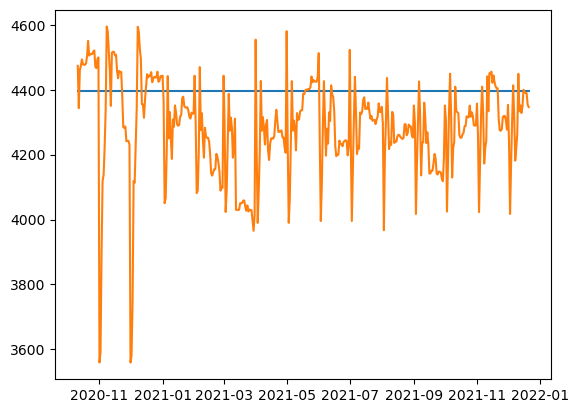

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


4.534336737723186 	--> smoothing_level: 0.30000000000000004


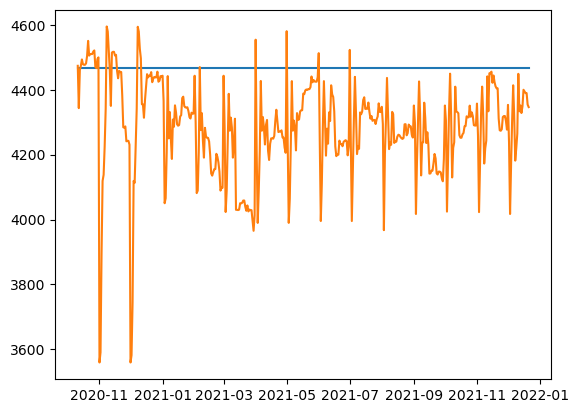

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


5.607609447751278 	--> smoothing_level: 0.4


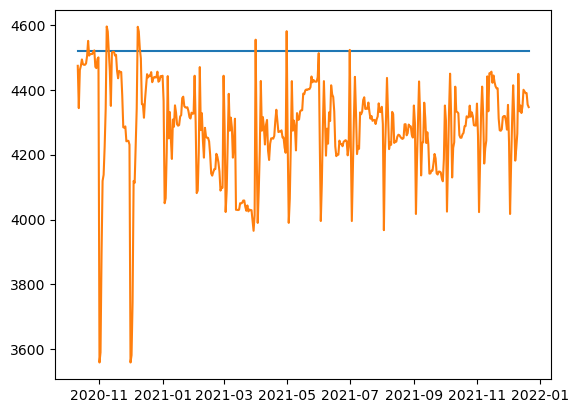

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


6.217296952427811 	--> smoothing_level: 0.5


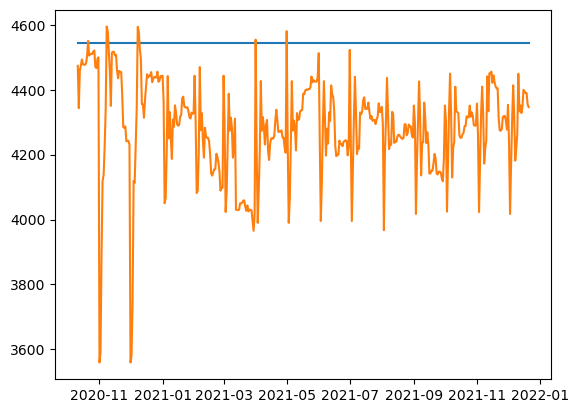

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


6.40191232293723 	--> smoothing_level: 0.6


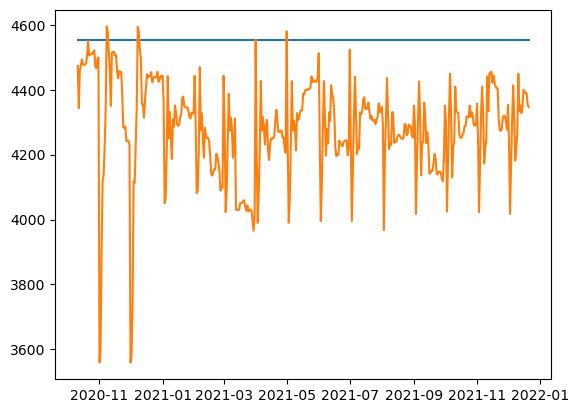

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


6.317450583727239 	--> smoothing_level: 0.7000000000000001


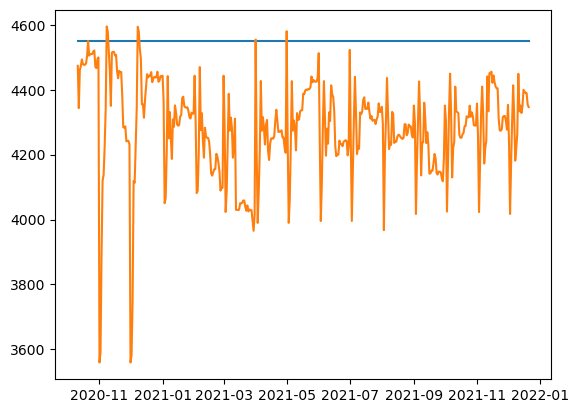

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


6.095812089194993 	--> smoothing_level: 0.8


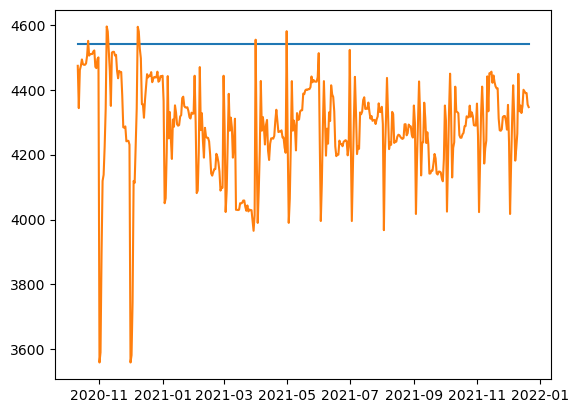

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


5.840059736354192 	--> smoothing_level: 0.9


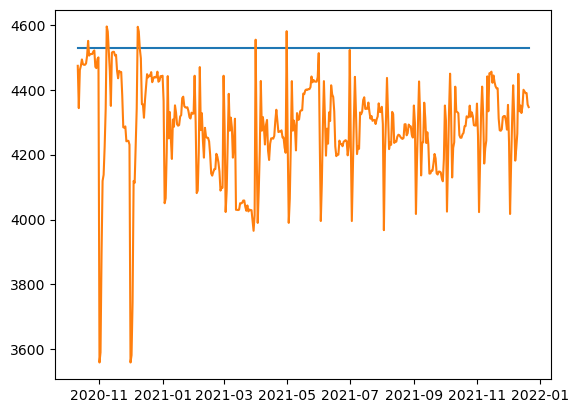

In [ ]:
for j in np.arange(0.1, 1, 0.1):
    ses_model = SimpleExpSmoothing(train_data['price']).fit(smoothing_level=j)
    pred_ses = ses_model.predict(start=test_data['Dummpy_time'][0], end=test_data['Dummpy_time'][-1])
    print(MAPE(pred_ses, test_data['price']), '\t--> smoothing_level:',j)
    plt.plot(pred_ses)
    plt.plot(test_data['price'])
    plt.show()

### Holt Method

In [ ]:
hw_model = Holt(train_data['price']).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start=test_data['Dummpy_time'][0], end=test_data['Dummpy_time'][-1])
MAPE(pred_hw, test_data['price'])

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


220.61237872336488

25.812739335599357 	-->     Smoothing_level: 0.1 	smoothing_trend : 0.1


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


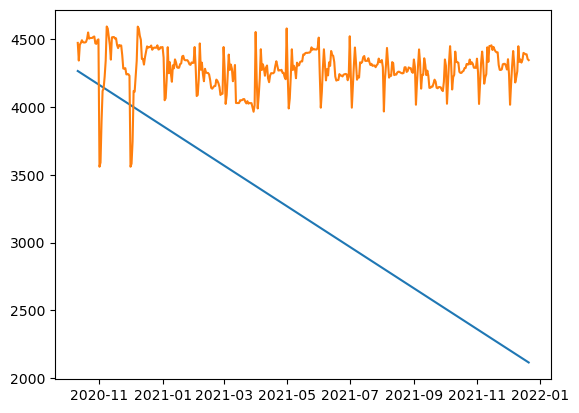

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


36.620993867254164 	-->     Smoothing_level: 0.1 	smoothing_trend : 0.2


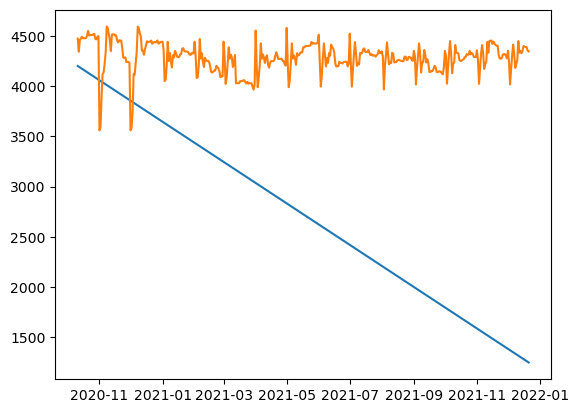

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


21.760523688624918 	-->     Smoothing_level: 0.1 	smoothing_trend : 0.3


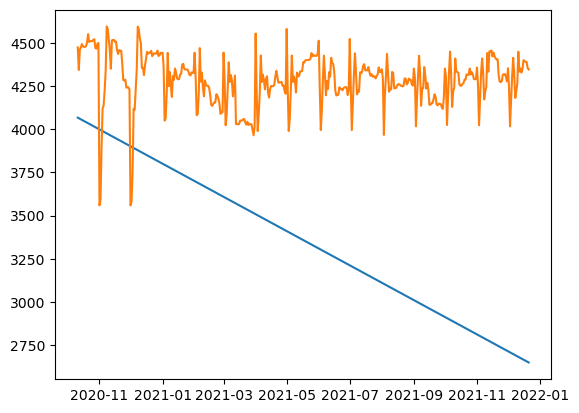

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


177.50224429602935 	-->     Smoothing_level: 0.1 	smoothing_trend : 0.4


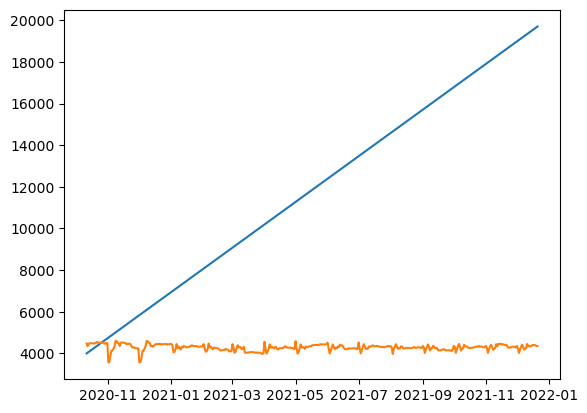

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


494.58391061712007 	-->     Smoothing_level: 0.1 	smoothing_trend : 0.5


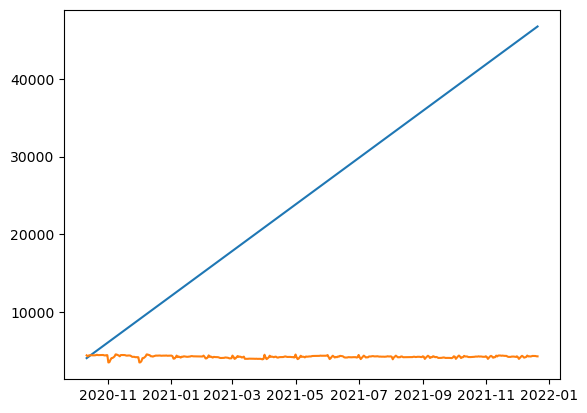

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


720.5269879703333 	-->     Smoothing_level: 0.1 	smoothing_trend : 0.6


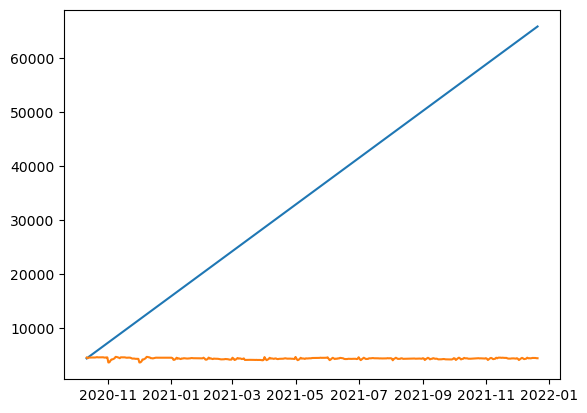

808.7246659868678 	-->     Smoothing_level: 0.1 	smoothing_trend : 0.7


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


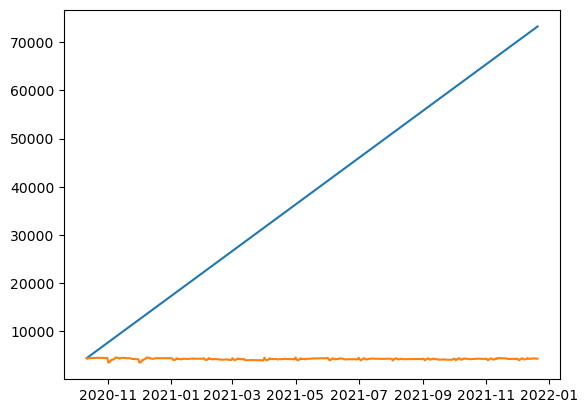

830.478428788299 	-->     Smoothing_level: 0.1 	smoothing_trend : 0.8


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


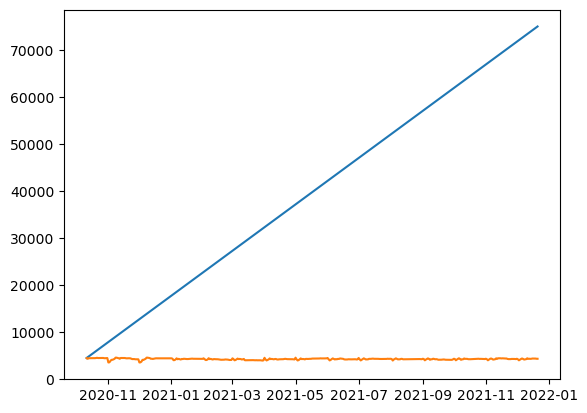

865.3850802263178

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


 	-->     Smoothing_level: 0.1 	smoothing_trend : 0.9


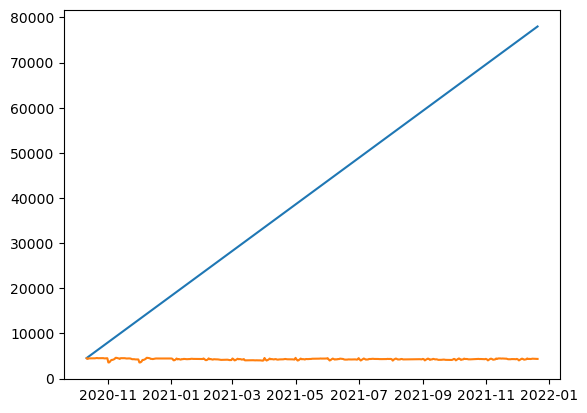

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


33.20088247489208 	-->     Smoothing_level: 0.2 	smoothing_trend : 0.1


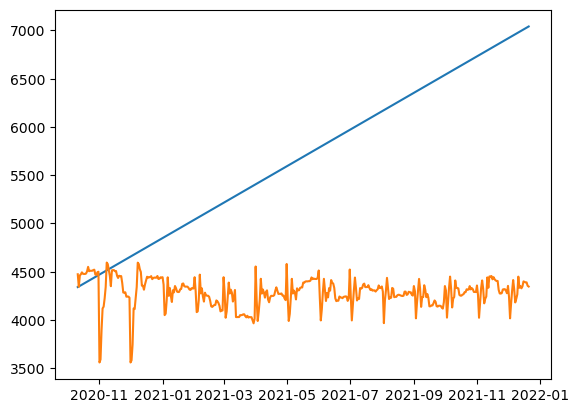

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


190.01476877748314 	-->     Smoothing_level: 0.2 	smoothing_trend : 0.2


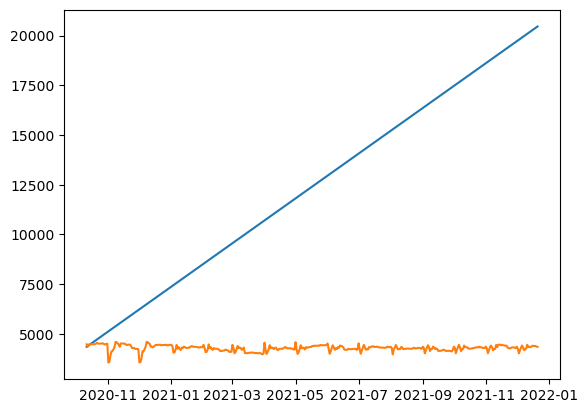

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


443.32839134607684 	-->     Smoothing_level: 0.2 	smoothing_trend : 0.3


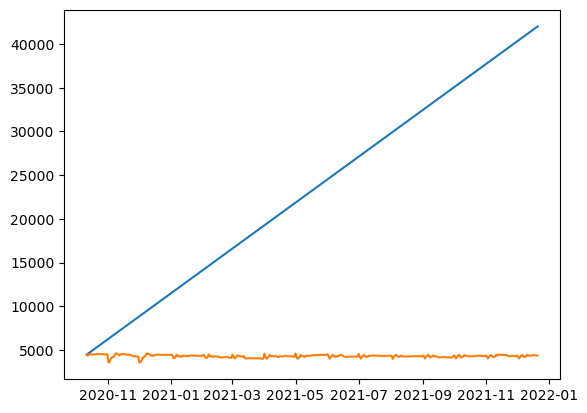

647.9120542770611 	-->     Smoothing_level: 0.2 	smoothing_trend : 0.4


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


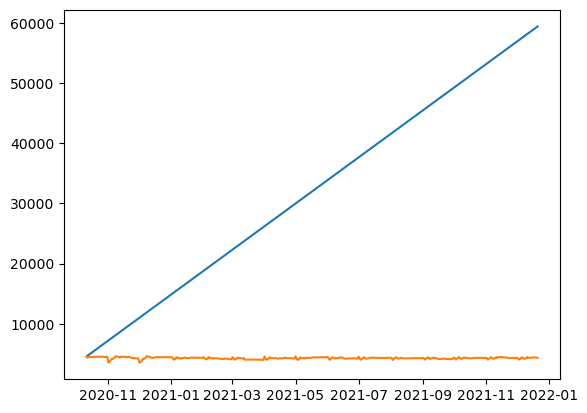

804.0164993607564 	-->     Smoothing_level: 0.2 	smoothing_trend : 0.5


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


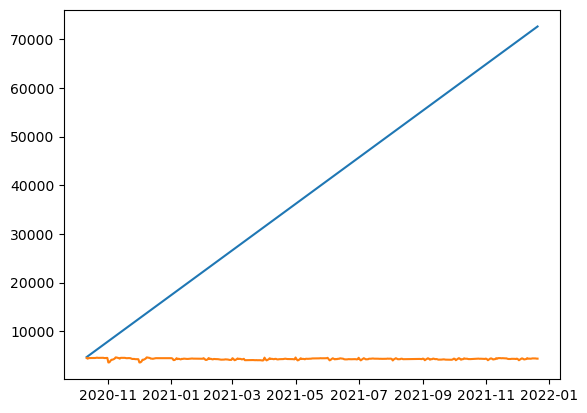

954.2665462438671 	-->     Smoothing_level: 0.2 	smoothing_trend : 0.6


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


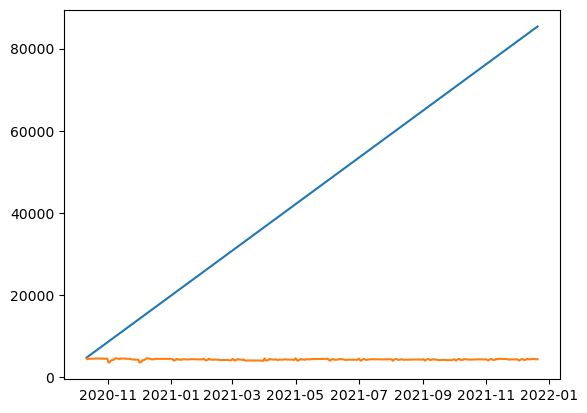

1100.1992581916459 	-->     Smoothing_level: 0.2 	smoothing_trend : 0.7


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


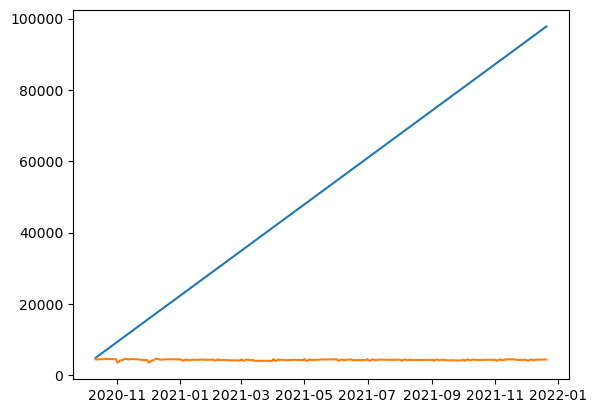

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


1203.0427006871055 	-->     Smoothing_level: 0.2 	smoothing_trend : 0.8


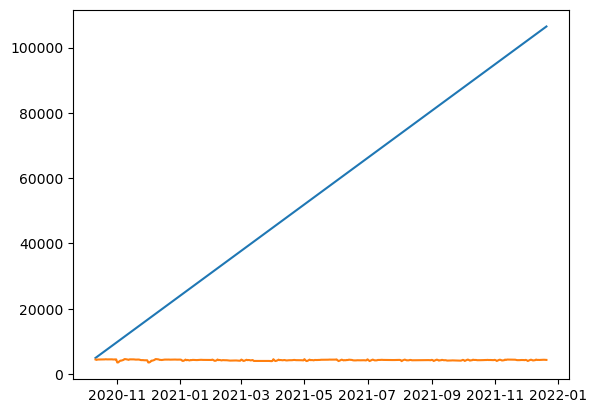

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


1229.8689081651025 	-->     Smoothing_level: 0.2 	smoothing_trend : 0.9


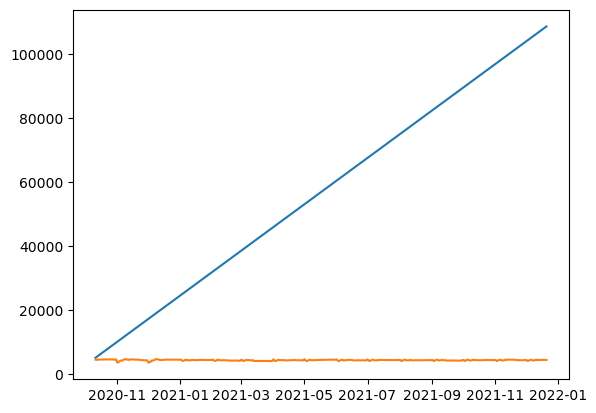

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


100.13119130336194 	-->     Smoothing_level: 0.3 	smoothing_trend : 0.1


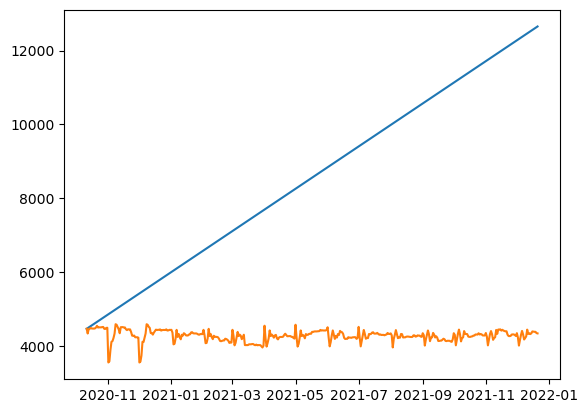

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


326.3215604483919 	-->     Smoothing_level: 0.3 	smoothing_trend : 0.2


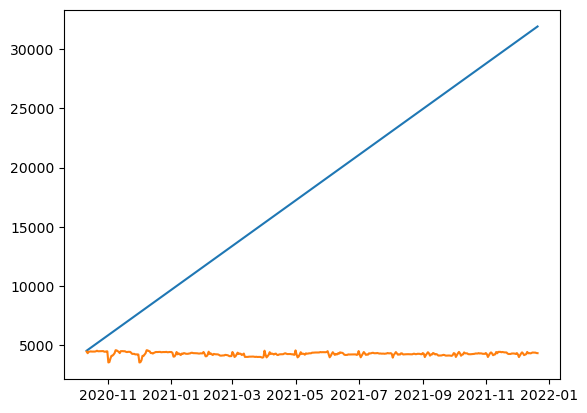

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


555.5355819290759 	-->     Smoothing_level: 0.3 	smoothing_trend : 0.3


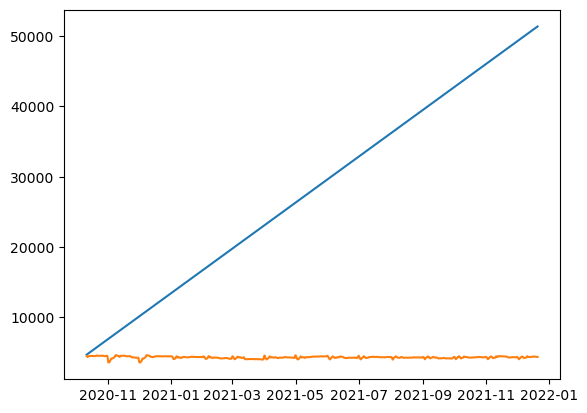

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


726.208204270872 	-->     Smoothing_level: 0.3 	smoothing_trend : 0.4


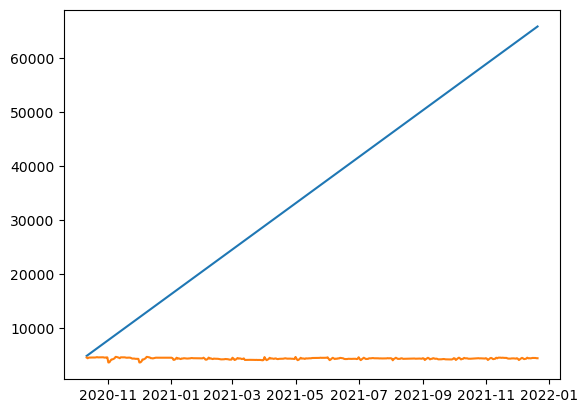

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


836.7014786638794 	-->     Smoothing_level: 0.3 	smoothing_trend : 0.5


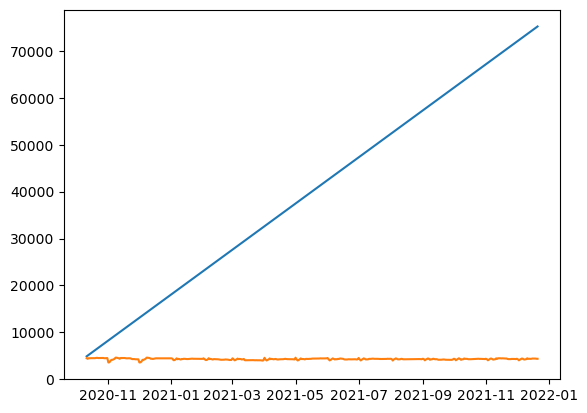

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


873.1520354213966 	-->     Smoothing_level: 0.3 	smoothing_trend : 0.6


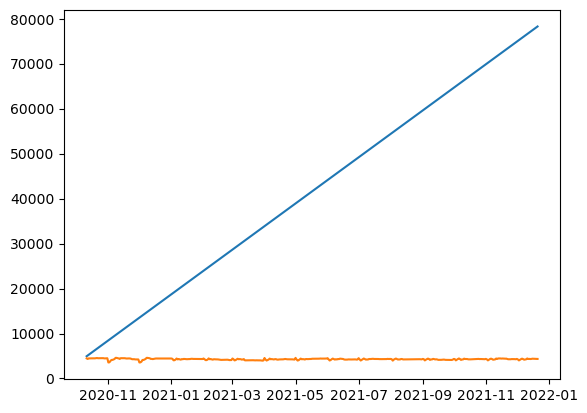

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


833.0562344890645 	-->     Smoothing_level: 0.3 	smoothing_trend : 0.7


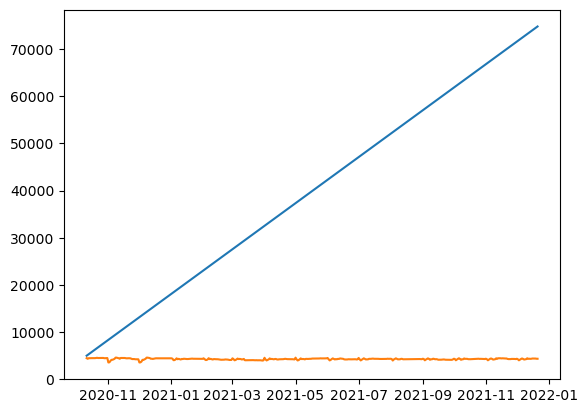

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


727.9082728267355 	-->     Smoothing_level: 0.3 	smoothing_trend : 0.8


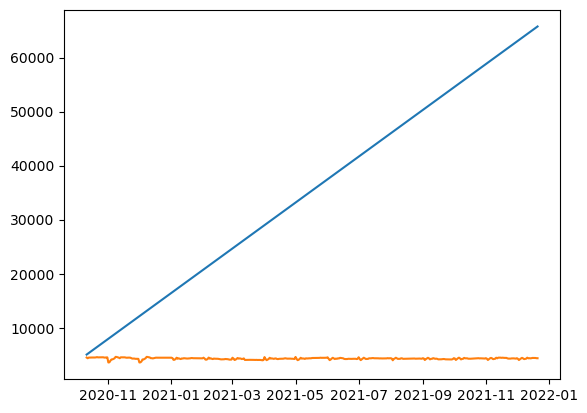

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


564.8568061869323 	-->     Smoothing_level: 0.3 	smoothing_trend : 0.9


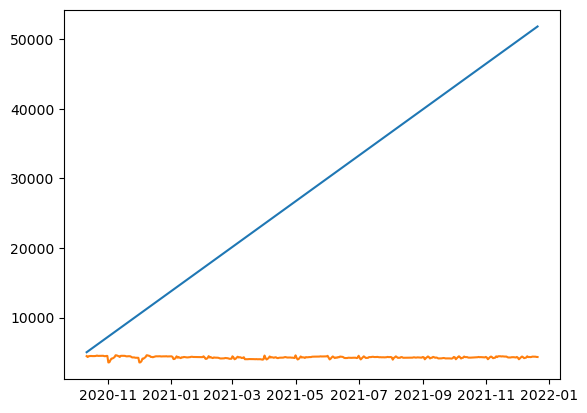

136.27597999467093 	-->     Smoothing_level: 0.4 	smoothing_trend : 0.1


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


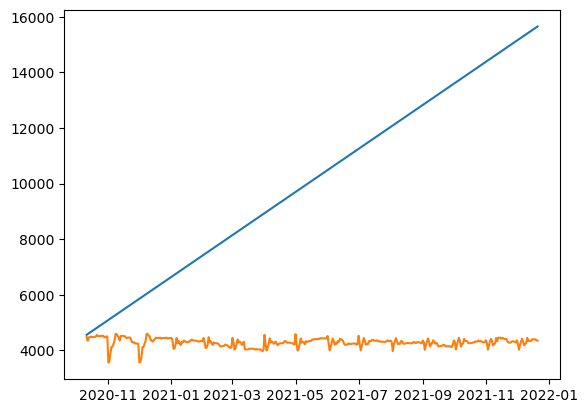

361.9248816397978 	-->     Smoothing_level: 0.4 	smoothing_trend : 0.2


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


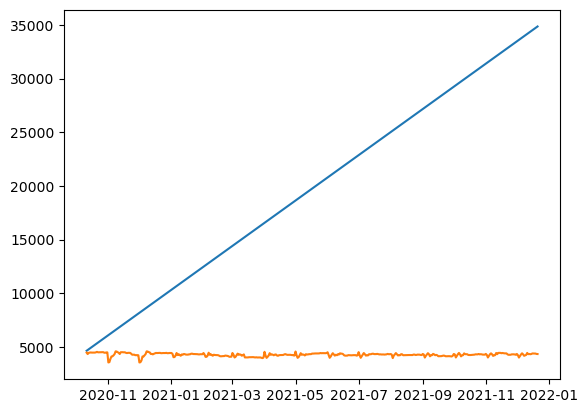

541.9643084829299 	-->     Smoothing_level: 0.4 	smoothing_trend : 0.3


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


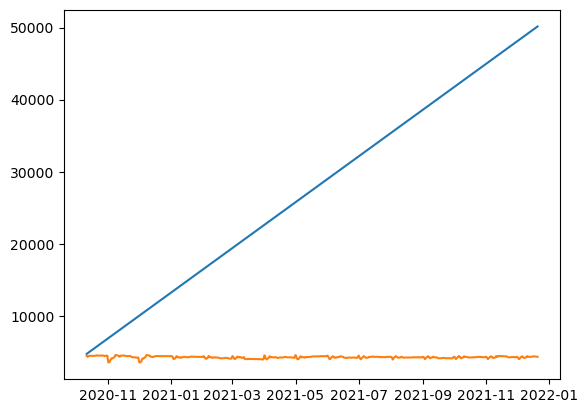

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


629.8286817864234 	-->     Smoothing_level: 0.4 	smoothing_trend : 0.4


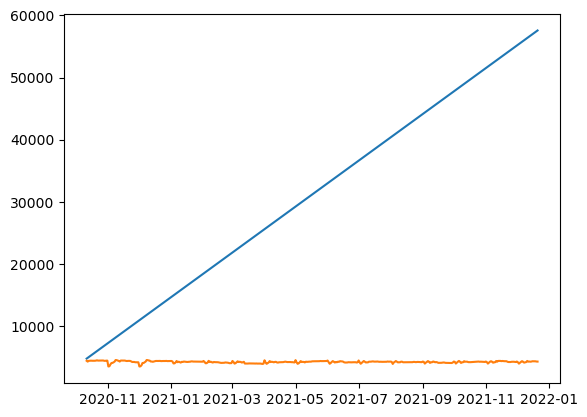

620.8044693740198 	-->     Smoothing_level: 0.4 	smoothing_trend : 0.5


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


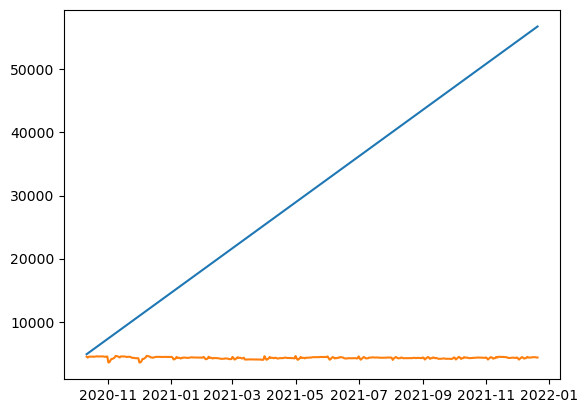

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


523.2262210322401 	-->     Smoothing_level: 0.4 	smoothing_trend : 0.6


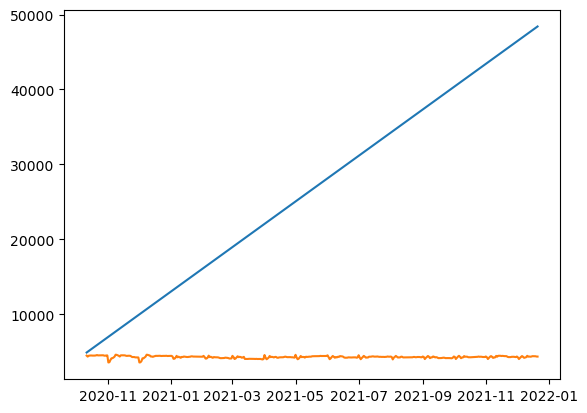

355.15675108498664 	-->     Smoothing_level: 0.4 	smoothing_trend : 0.7


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


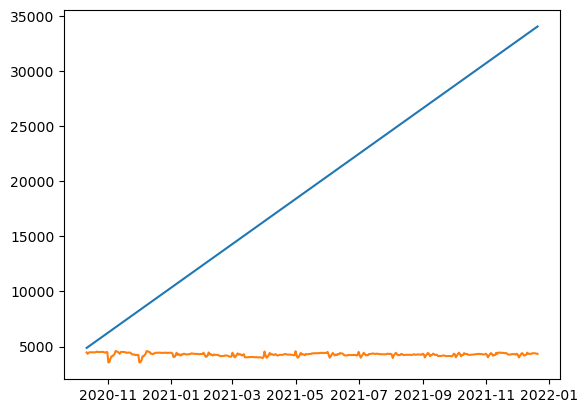

140.3869053215817 	-->     Smoothing_level: 0.4 	smoothing_trend : 0.8


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


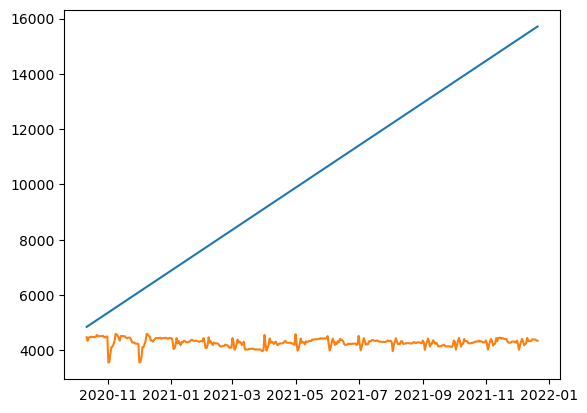

92.34212864583371 	-->     Smoothing_level: 0.4 	smoothing_trend : 0.9


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


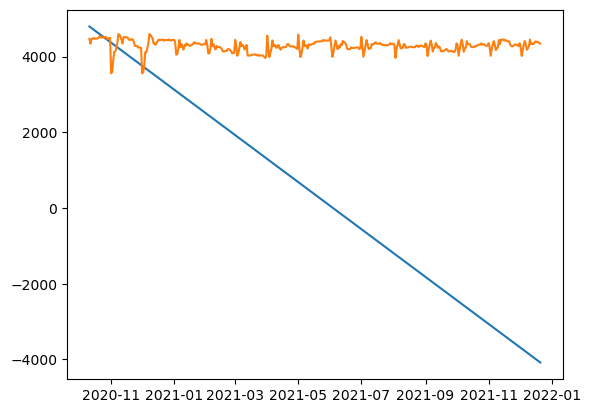

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


147.59860601240896 	-->     Smoothing_level: 0.5 	smoothing_trend : 0.1


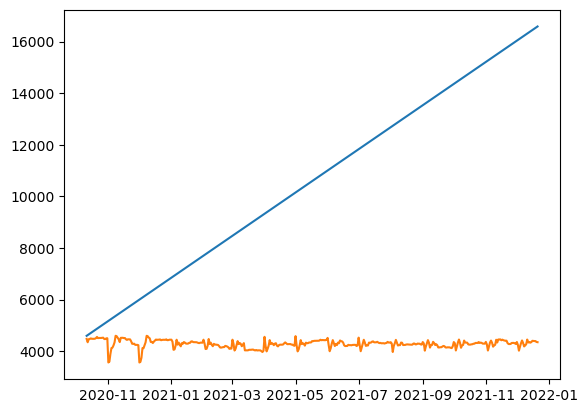

345.8069698722963 	-->     Smoothing_level: 0.5 	smoothing_trend : 0.2


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


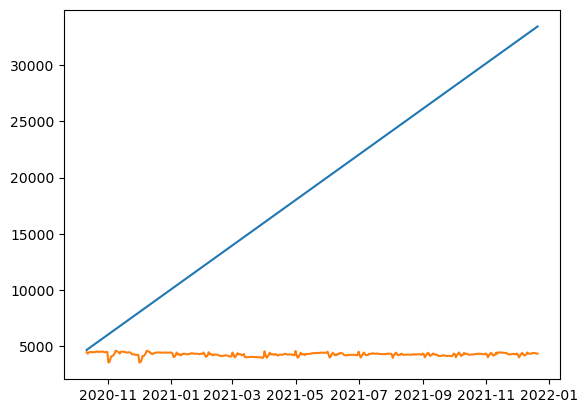

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


462.27542159884615 	-->     Smoothing_level: 0.5 	smoothing_trend : 0.3


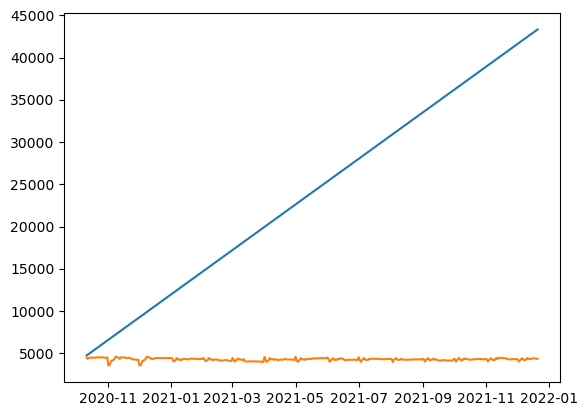

466.3059554616793 	-->     Smoothing_level: 0.5 	smoothing_trend : 0.4


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


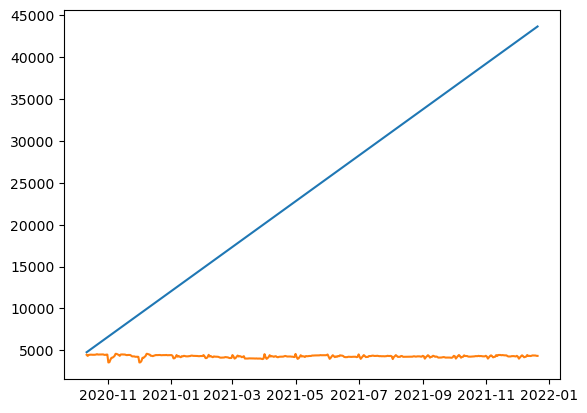

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


371.96217511835175 	-->     Smoothing_level: 0.5 	smoothing_trend : 0.5


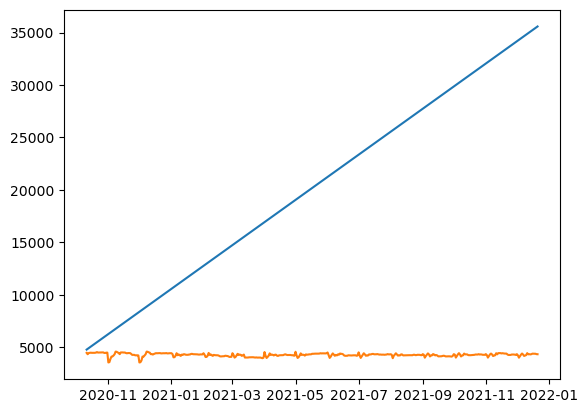

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


208.64168722588784 	-->     Smoothing_level: 0.5 	smoothing_trend : 0.6


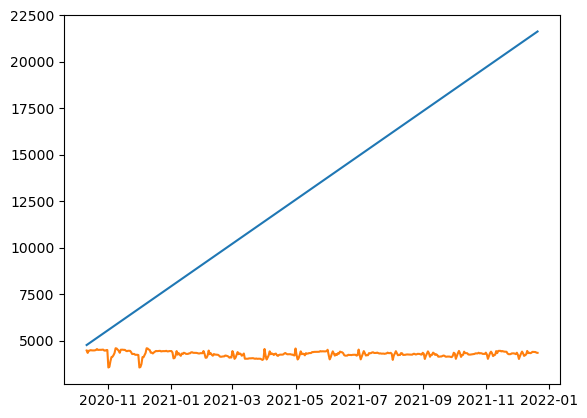

11.799261677022383 	-->     Smoothing_level: 0.5 	smoothing_trend : 0.7


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


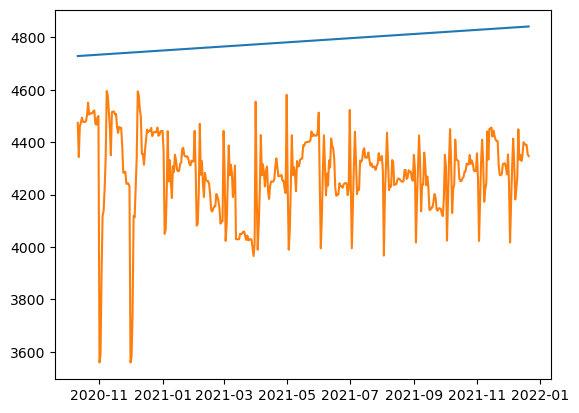

185.07150524829052 	-->     Smoothing_level: 0.5 	smoothing_trend : 0.8


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


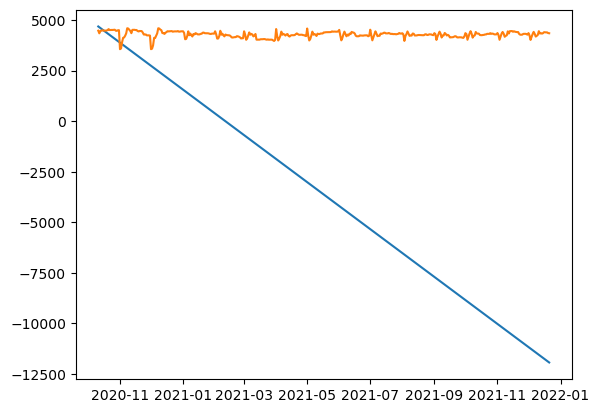

356.8853696249651 	-->     Smoothing_level: 0.5 	smoothing_trend : 0.9


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


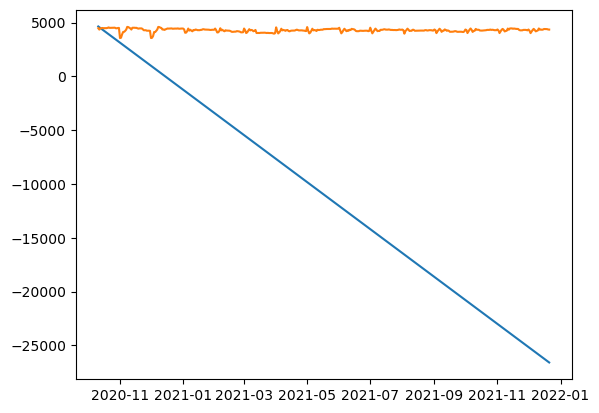

144.37254075742885 	-->     Smoothing_level: 0.6 	smoothing_trend : 0.1


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


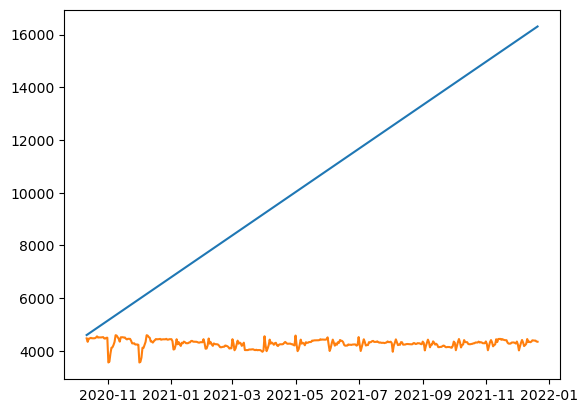

306.98066286030314 	-->     Smoothing_level: 0.6 	smoothing_trend : 0.2


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


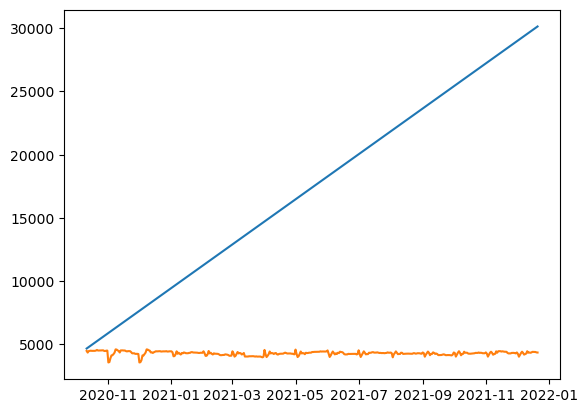

366.708928651672 	-->     Smoothing_level: 0.6 	smoothing_trend : 0.3


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


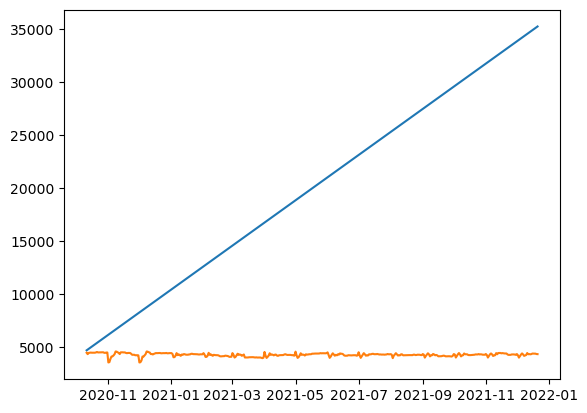

313.16310180591495 	-->     Smoothing_level: 0.6 	smoothing_trend : 0.4


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


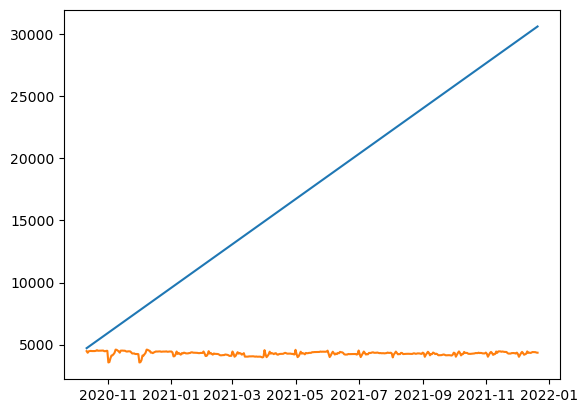

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


178.51619071649415 	-->     Smoothing_level: 0.6 	smoothing_trend : 0.5


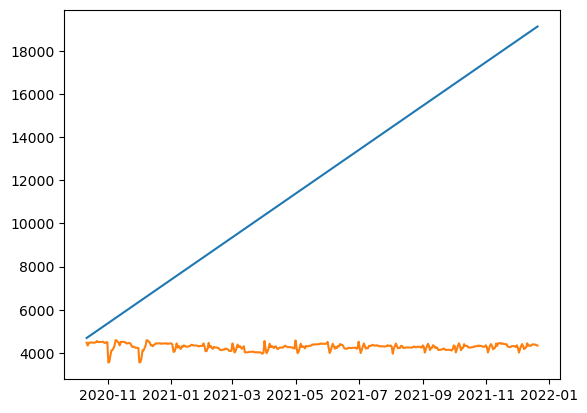

4.257752511485902 	-->     Smoothing_level: 0.6 	smoothing_trend : 0.6


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


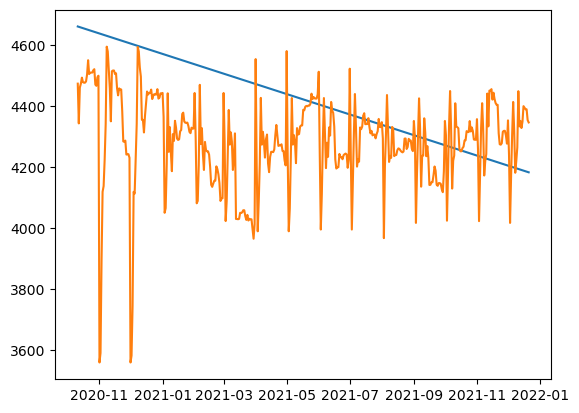

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


177.5248761835519 	-->     Smoothing_level: 0.6 	smoothing_trend : 0.7


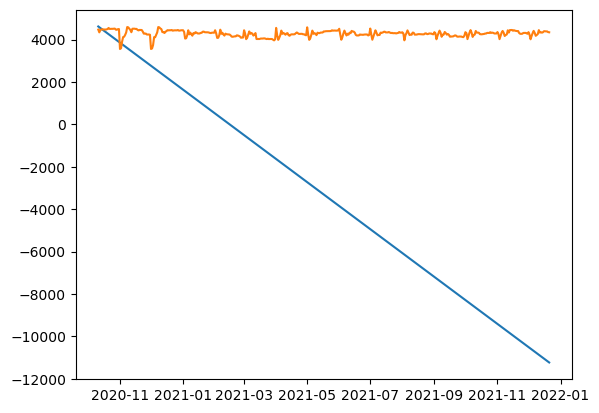

341.930157788429 	-->     Smoothing_level: 0.6 	smoothing_trend : 0.8


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


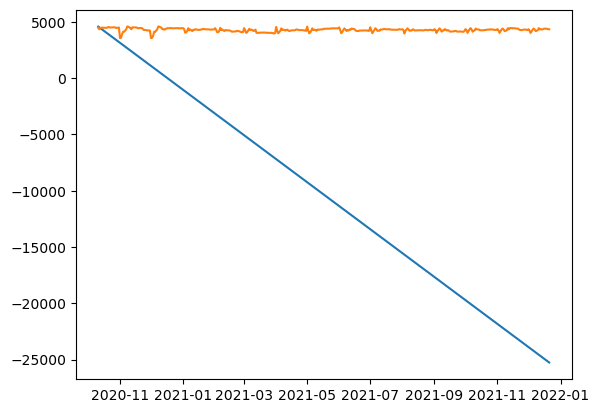

483.5465101794997 	-->     Smoothing_level: 0.6 	smoothing_trend : 0.9


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


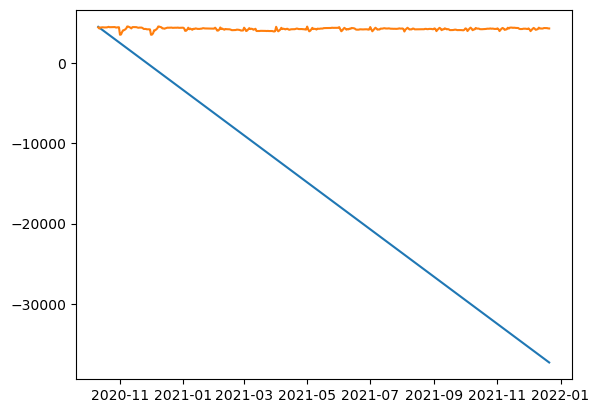

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


134.06080428913296 	-->     Smoothing_level: 0.7 	smoothing_trend : 0.1


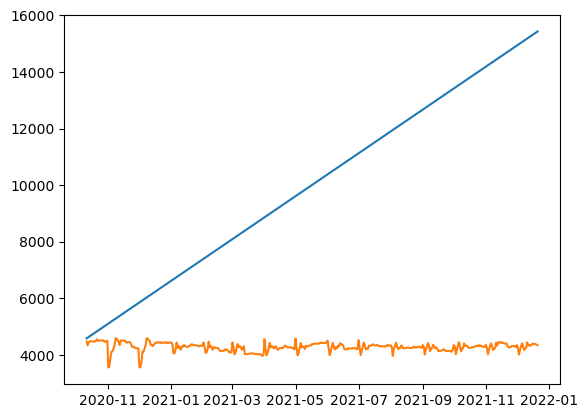

262.4258995048508 	-->     Smoothing_level: 0.7 	smoothing_trend : 0.2


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


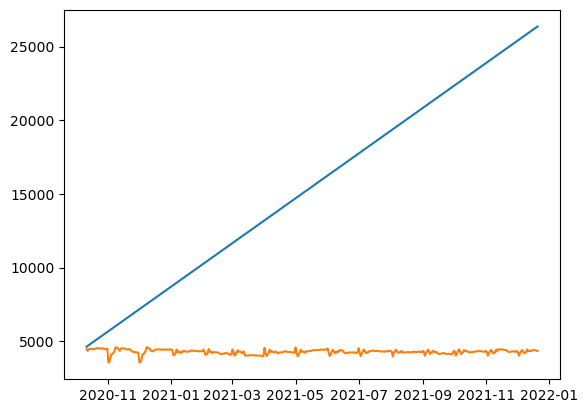

278.9836642803696 	-->     Smoothing_level: 0.7 	smoothing_trend : 0.3


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


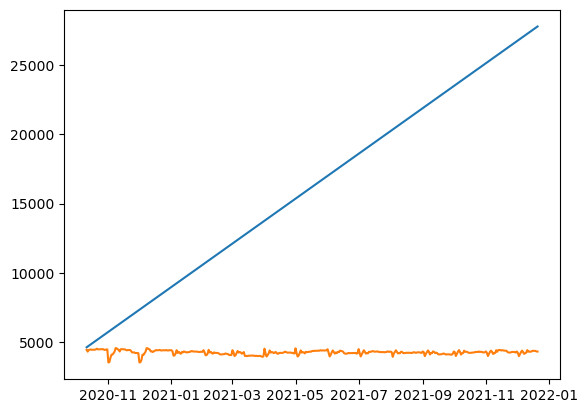

191.0046102729516 	-->     Smoothing_level: 0.7 	smoothing_trend : 0.4


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


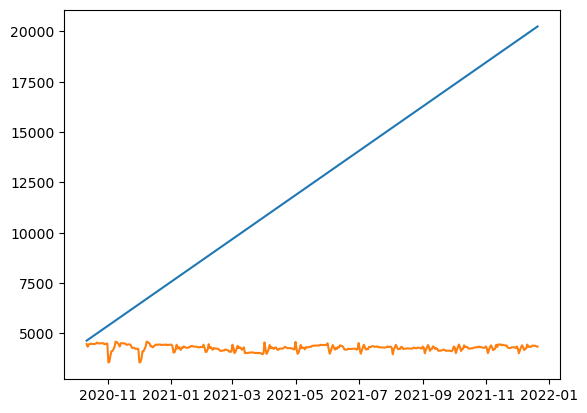

40.104683119593204 	-->     Smoothing_level: 0.7 	smoothing_trend : 0.5


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


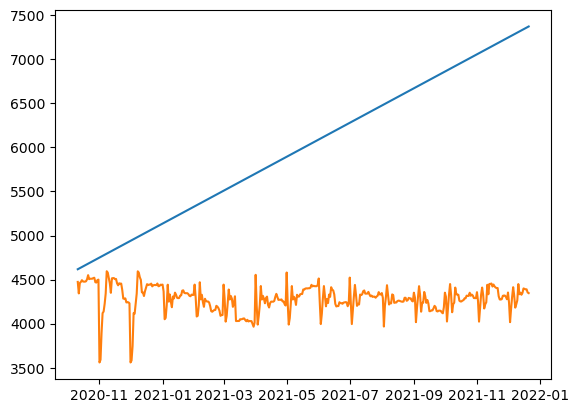

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


134.58060242684164 	-->     Smoothing_level: 0.7 	smoothing_trend : 0.6


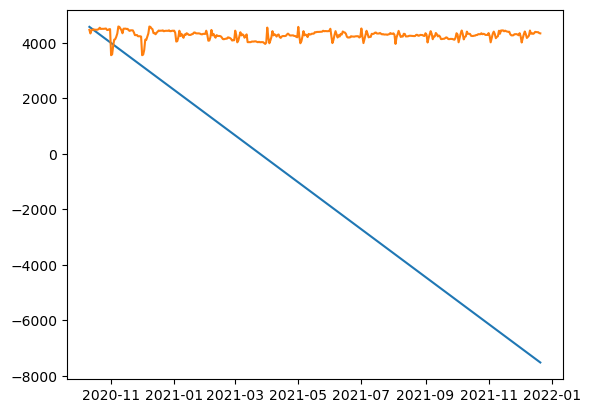

307.678168129299 	-->     Smoothing_level: 0.7 	smoothing_trend : 0.7


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


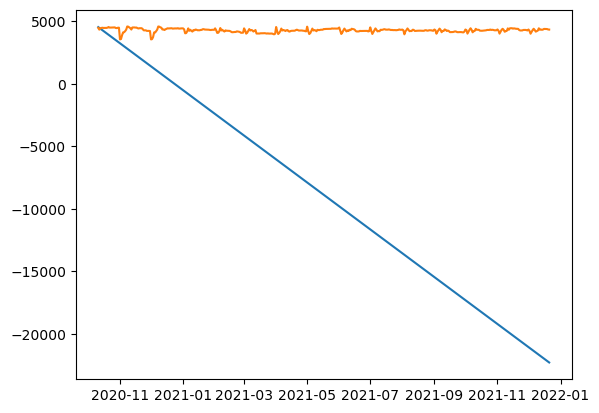

470.67907626521696

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


 	-->     Smoothing_level: 0.7 	smoothing_trend : 0.8


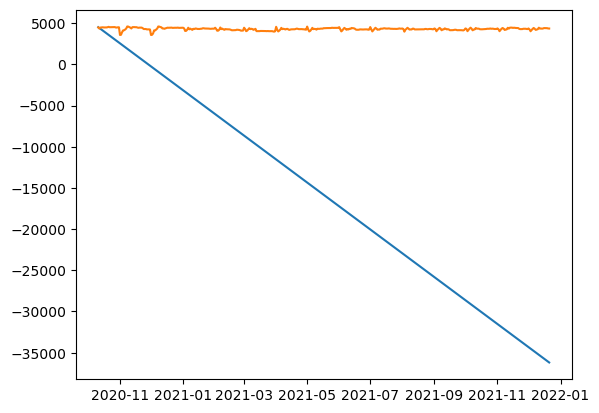

625.9406101062908 	-->     Smoothing_level: 0.7 	smoothing_trend : 0.9


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


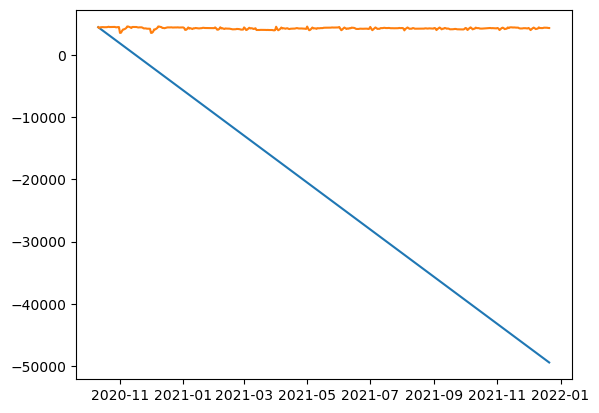

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


121.36648606652125 	-->     Smoothing_level: 0.8 	smoothing_trend : 0.1


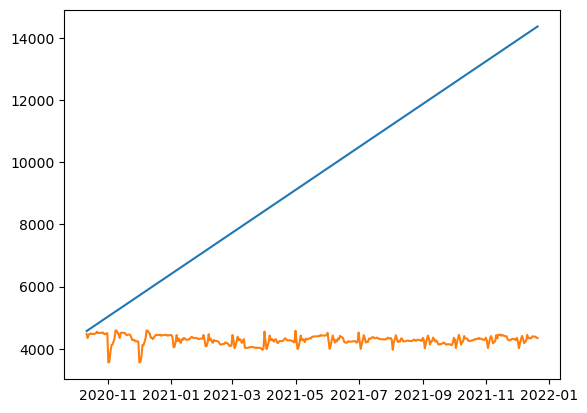

220.61237872336488 	-->     Smoothing_level: 0.8 	smoothing_trend : 0.2


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


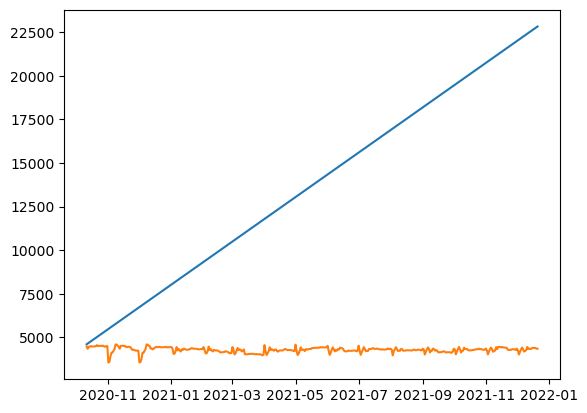

206.45190285210424

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


 	-->     Smoothing_level: 0.8 	smoothing_trend : 0.3


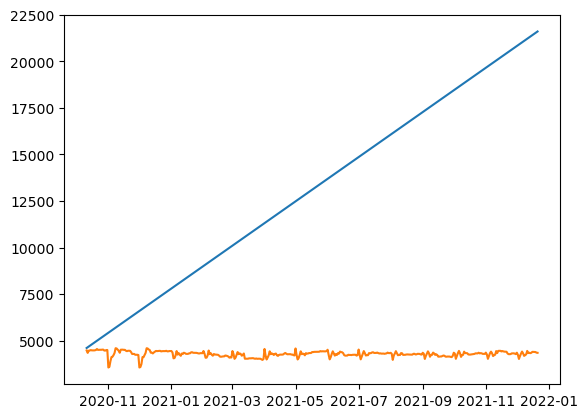

98.41003851805348 	-->     Smoothing_level: 0.8 	smoothing_trend : 0.4


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


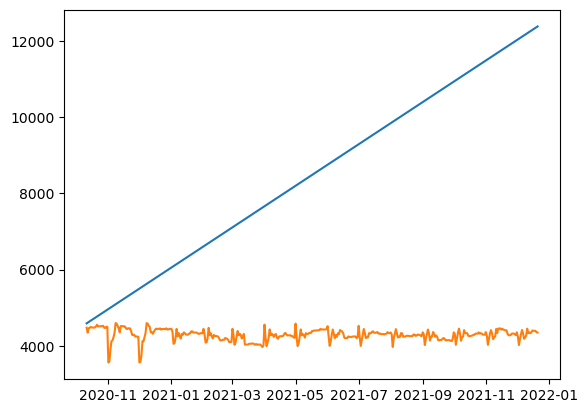

59.89107422260307 	-->     Smoothing_level: 0.8 	smoothing_trend : 0.5


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


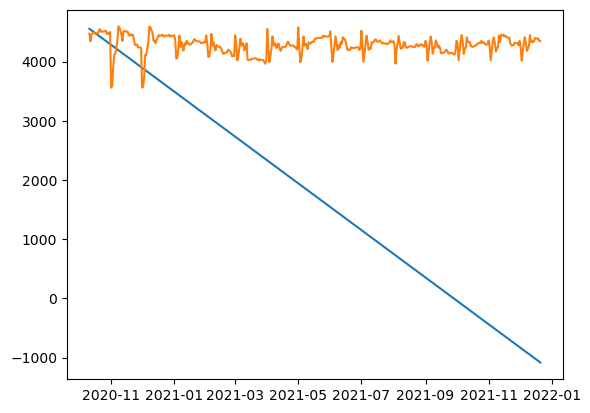

233.19830385134028 	-->     Smoothing_level: 0.8 	smoothing_trend : 0.6


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


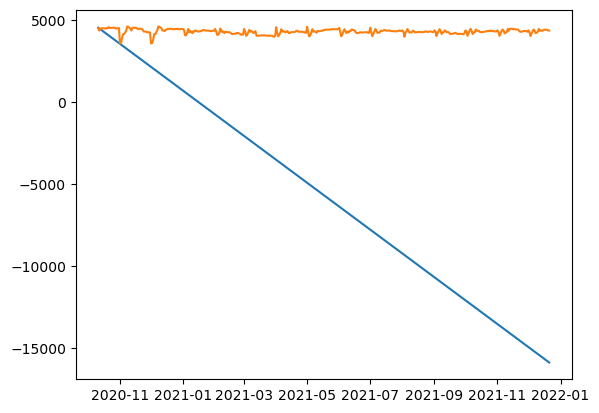

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


404.67977636887935 	-->     Smoothing_level: 0.8 	smoothing_trend : 0.7


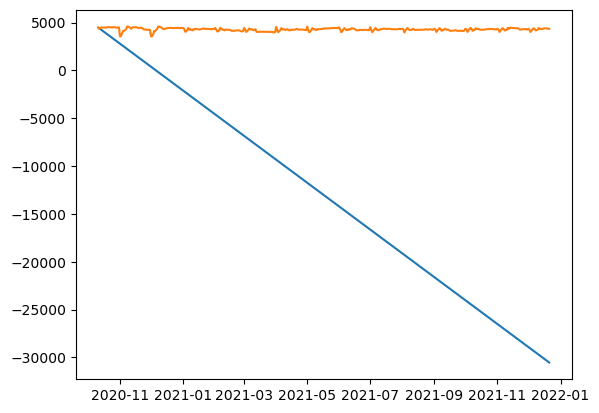

567.9917000969588 	-->     Smoothing_level: 0.8 	smoothing_trend : 0.8


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


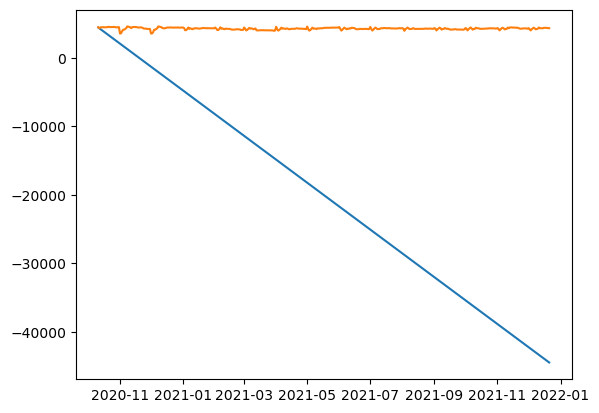

721.6758271013032 	-->     Smoothing_level: 0.8 	smoothing_trend : 0.9


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


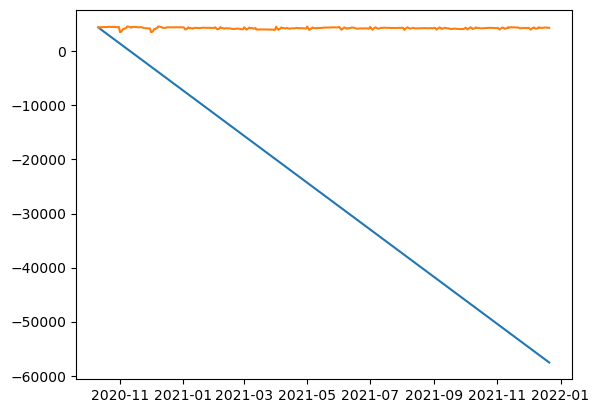

109.35576882199149 	-->     Smoothing_level: 0.9 	smoothing_trend : 0.1


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


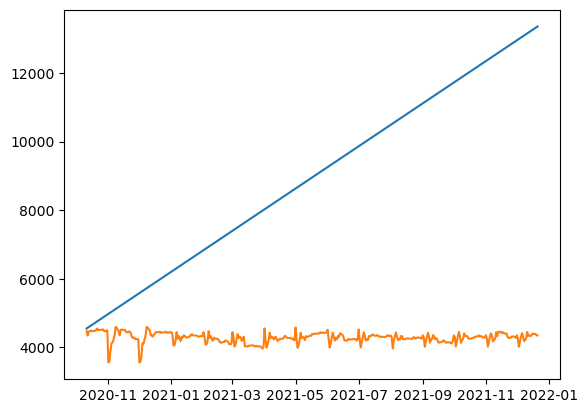

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


186.2265339136479 	-->     Smoothing_level: 0.9 	smoothing_trend : 0.2


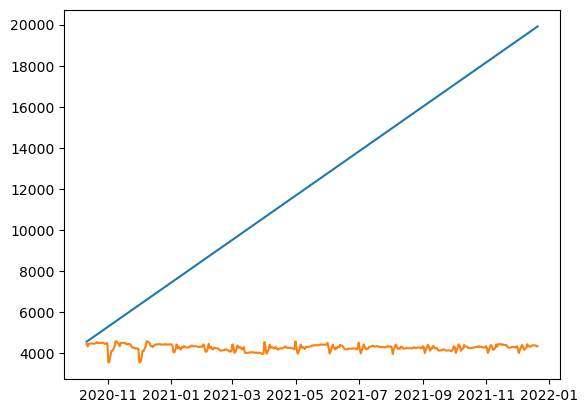

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


152.48940803892313 	-->     Smoothing_level: 0.9 	smoothing_trend : 0.3


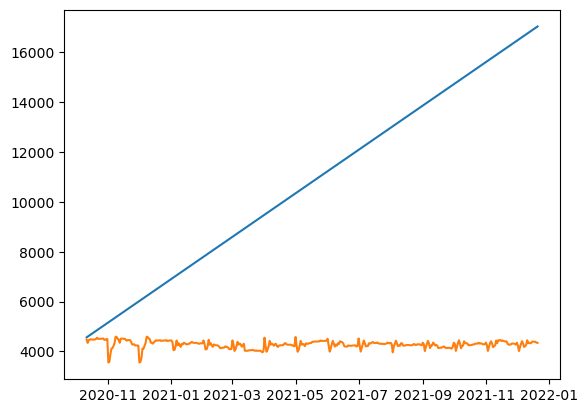

35.87149096605736 	-->     Smoothing_level: 0.9 	smoothing_trend : 0.4


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


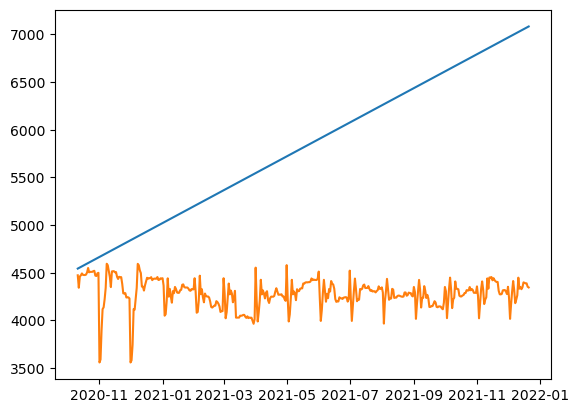

119.44051167556502 	-->     Smoothing_level: 0.9 	smoothing_trend : 0.5


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


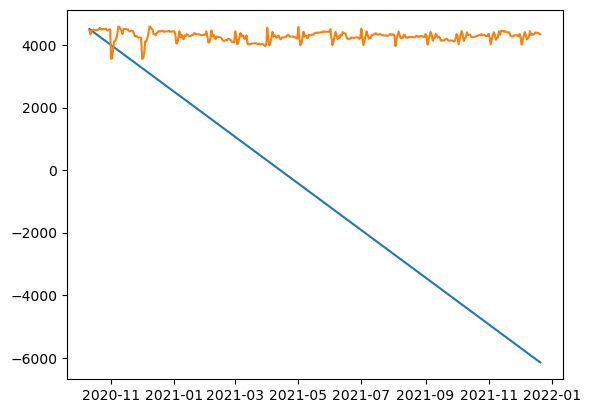

281.58399084353886 	-->     Smoothing_level: 0.9 	smoothing_trend : 0.6


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


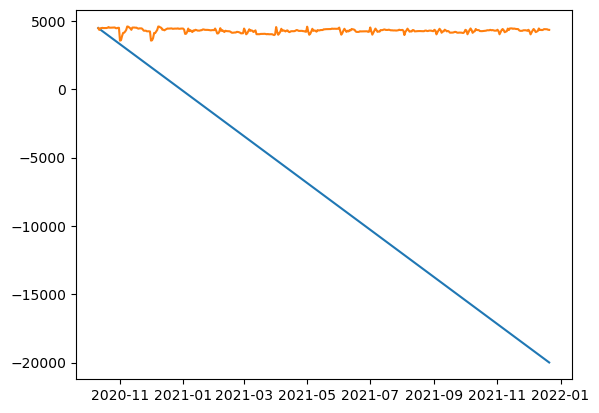

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


433.34224371714356 	-->     Smoothing_level: 0.9 	smoothing_trend : 0.7


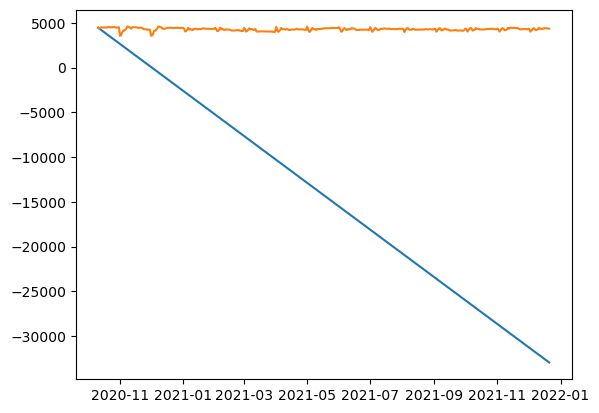

564.4209451869015 	-->     Smoothing_level: 0.9 	smoothing_trend : 0.8


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


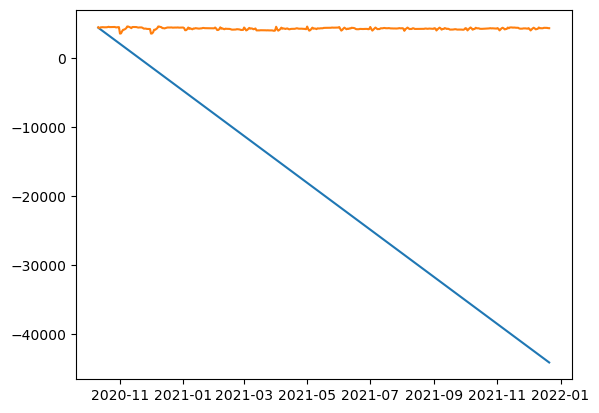

665.9608428419597

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


 	-->     Smoothing_level: 0.9 	smoothing_trend : 0.9


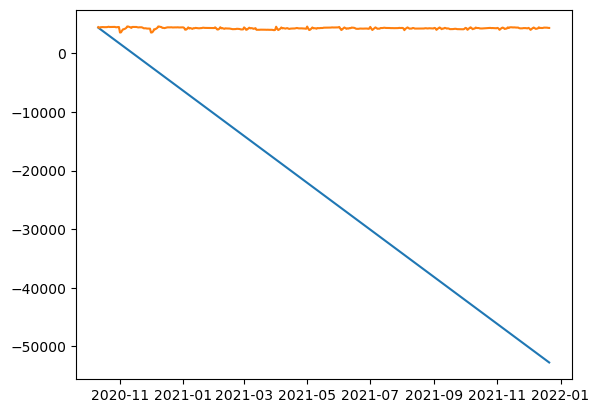

In [ ]:
holt_model_result = pd.DataFrame(columns=['smoothing_level','smoothing_trend',' MAPE'])
for i in np.arange(0.1, 1, 0.1):
    for j in np.arange(0.1, 1, 0.1):
        hw_model = Holt(train_data['price']).fit(smoothing_level=i, smoothing_trend=j)
        pred_hw = hw_model.predict(start=test_data['Dummpy_time'][0], end=test_data['Dummpy_time'][-1])
        print(MAPE(pred_hw, test_data['price']), '\t-->     Smoothing_level:',round(i,1), '\tsmoothing_trend :',round(j,1))
        res = MAPE(pred_hw, test_data['price'])
        holt_model_result.loc[len(holt_model_result)] = [i,j,res]
        plt.plot(pred_hw)
        plt.plot(test_data['price'])
        plt.show()

In [ ]:
holt_model_result.rename({' MAPE':'MAPE'}, axis=1, inplace=True)

In [ ]:
holt_model_result.sort_values(by='MAPE')

smoothing_level  smoothing_trend         MAPE
50              0.6              0.6     4.257753
42              0.5              0.7    11.799262
2               0.1              0.3    21.760524
0               0.1              0.1    25.812739
9               0.2              0.1    33.200882
..              ...              ...          ...
23              0.3              0.6   873.152035
14              0.2              0.6   954.266546
15              0.2              0.7  1100.199258
16              0.2              0.8  1203.042701
17              0.2              0.9  1229.868908

[81 rows x 3 columns]

### Holt Winter Method

In [ ]:
hwe_add_model = ExponentialSmoothing(train_data['price'],seasonal='add',trend='add',seasonal_periods = 2).fit()
pred_hwe_add = hwe_add_model.predict(start=test_data['Dummpy_time'][0], end=test_data['Dummpy_time'][-1])
MAPE(pred_hwe_add,test_data['price'])

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


31.215628712038423

In [ ]:
hwe_add_model = ExponentialSmoothing(train_data['price'],seasonal='add',trend='mul',seasonal_periods = 365).fit()
pred_hwe_add = hwe_add_model.predict(start=test_data['Dummpy_time'][0], end=test_data['Dummpy_time'][-1])
MAPE(pred_hwe_add,test_data['price'])

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


7.138323468128182

In [ ]:
hwe_add_add_result = pd.DataFrame(columns=['Seasonal_Period','MAPE'], index=np.arange(0,366))
for i in range(2,366):
    hwe_add_model = ExponentialSmoothing(train_data['price'],seasonal='add',trend='add',seasonal_periods = i).fit()
    pred_hwe_add = hwe_add_model.predict(start=test_data['Dummpy_time'][0], end=test_data['Dummpy_time'][-1])
    res = MAPE(pred_hwe_add, test_data['price'] )
    hwe_add_add_result.loc[i-2] = [i,res]


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Use

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Use

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Use

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-pac

In [ ]:
hwe_add_add_result.sort_values(by='MAPE')

Seasonal_Period        MAPE
318             320    3.569655
317             319    5.728553
59               61    5.919085
301             303     8.29955
90               92    9.029142
..              ...         ...
276             278  113.700197
278             280  121.187981
314             316    990.8448
364             NaN         NaN
365             NaN         NaN

[366 rows x 2 columns]

In [ ]:
hwe_add_mul_result = pd.DataFrame(columns=['Seasonal_period','MAPE'], index=np.arange(0,364))
for i in range(2,366):
    hwe_add_mul_model = ExponentialSmoothing(train_data['price'], seasonal='add', trend='mul', seasonal_periods=i).fit()
    pred_hwe_add_mul = hwe_add_mul_model.predict(start=test_data['Dummpy_time'][0], end=test_data['Dummpy_time'][-1])
    res = MAPE(pred_hwe_add_mul,test_data['price'])
    hwe_add_mul_result.loc[i] = [i , res]

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Use

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Use

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Use

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Use

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Use

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-pac

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Use

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-pac

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

In [ ]:
hwe_add_mul_result.sort_values(by='MAPE')

Seasonal_period        MAPE
147             147    2.959309
127             127    3.522791
87               87    3.555562
82               82     3.78142
149             149    3.798818
..              ...         ...
14               14  128.432563
11               11  136.394611
13               13  149.659821
0               NaN         NaN
1               NaN         NaN

[366 rows x 2 columns]

In [ ]:
hwe_mul_mul_result = pd.DataFrame(columns=['Seasonal_period','MAPE'], index=np.arange(0,365))
for i in range(2,364):
    hwe_mul_mul_model = ExponentialSmoothing(train_data['price'], seasonal='mul', trend='mul', seasonal_periods=i).fit()
    pred_hwe_mul_mul = hwe_add_mul_model.predict(start=test_data['Dummpy_time'][0], end=test_data['Dummpy_time'][-1])
    res = MAPE(pred_hwe_mul_mul,test_data['price'])
    hwe_mul_mul_result.loc[i] = [i , res]
hwe_mul_mul_result.sort_values(by='MAPE')

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Use

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-pac

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-pac

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-pac

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-pac

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-pac

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-pac

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-pac

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_

Seasonal_period      MAPE
2                 2  7.138323
247             247  7.138323
246             246  7.138323
245             245  7.138323
244             244  7.138323
..              ...       ...
115             115  7.138323
363             363  7.138323
0               NaN       NaN
1               NaN       NaN
364             NaN       NaN

[365 rows x 2 columns]

### Let's see the best hyper parameters and results of the all models.

In [ ]:
hwe_add_mul_result.sort_values(by="MAPE").reset_index(drop=True).loc[0]

Seasonal_period         147
MAPE               2.959309
Name: 0, dtype: object

In [ ]:

print('\033[1m' + 'Simple Exponetial Smoothing best Parameters')
print('\n')
print('\033[0m')
print(ses_model_result.sort_values(by='MAPE').reset_index(drop=True).loc[0])
print('\n')
print('\033[1m' + 'Holts method best Parameters')
print('\n')
print('\033[0m')
print(holt_model_result.sort_values(by='MAPE').reset_index(drop=True).loc[0])
print('\n')
print('\033[1m' + 'Holts Winter method with additive seasonality and additive trend model best Parameters')
print('\n')
print('\033[0m')
print(hwe_add_add_result.sort_values(by='MAPE').reset_index(drop=True).loc[0])
print('\n')
print('\033[1m' + 'Holts Winter method with additive seasonality and Multiplicative trend model best Parameters')
print('\n')
print('\033[0m')
print(hwe_add_mul_result.sort_values(by='MAPE').reset_index(drop=True).loc[0])
print('\n')
print('\033[1m' + 'Holts Winter method with Multiplicative seasonality and Multiplicative trend model best Parameters')
print('\n')
print('\033[0m')
print(hwe_mul_mul_result.sort_values(by='MAPE').reset_index(drop=True).loc[0])


Simple Exponetial Smoothing best Parameters



Smoothing_Level    0.100000
MAPE               2.852817
Name: 0, dtype: float64


Holts method best Parameters



smoothing_level    0.600000
smoothing_trend    0.600000
MAPE               4.257753
Name: 0, dtype: float64


Holts Winter method with additive seasonality and additive trend model best Parameters



Seasonal_Period         320
MAPE               3.569655
Name: 0, dtype: object


Holts Winter method with additive seasonality and Multiplicative trend model best Parameters



Seasonal_period         147
MAPE               2.959309
Name: 0, dtype: object


Holts Winter method with Multiplicative seasonality and Multiplicative trend model best Parameters



Seasonal_period           2
MAPE               7.138323
Name: 0, dtype: object


### Lets train each model with training data and its best parameters.

Simple Exponetial Smoothing
2.852816938329612


C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


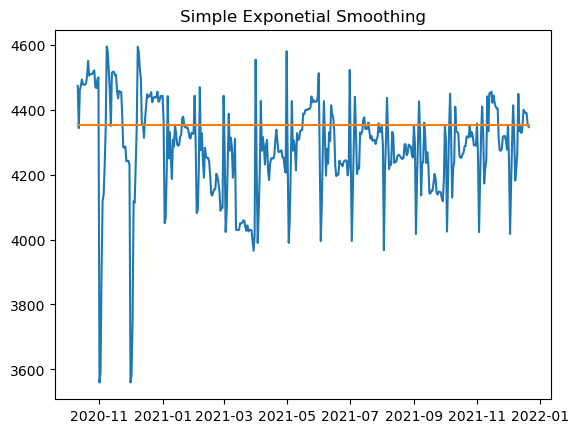

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


4.257752511485902
Holts Method


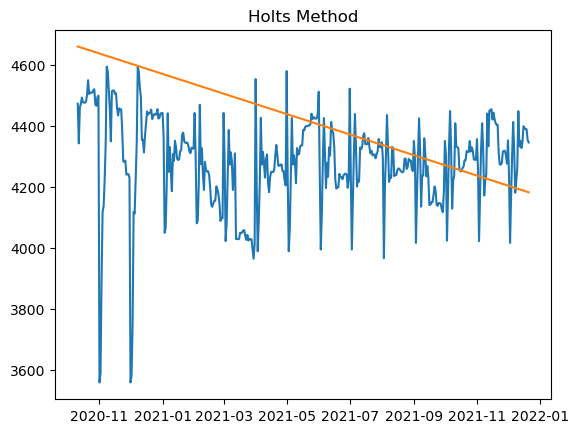

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


3.569654954592098
Holts Wintor Method with additive seasonality and additive trend


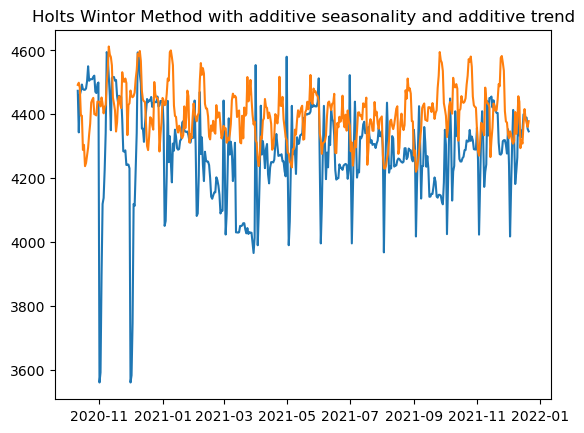

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2.9593089429917008
Holts Wintor Method with multiplicative seasonality and additive trend


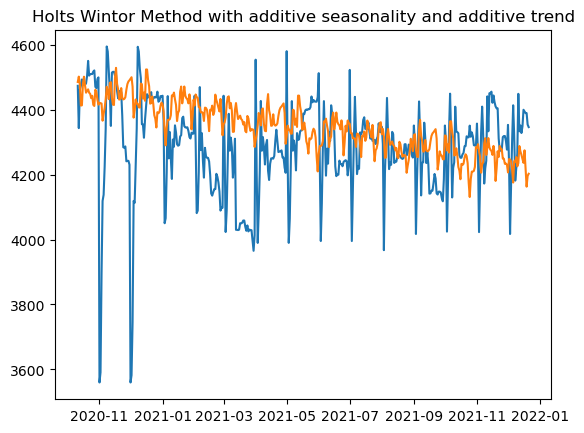

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Holts Wintor Method with multiplicative seasonality and multiplicative trend
99.06378571016917


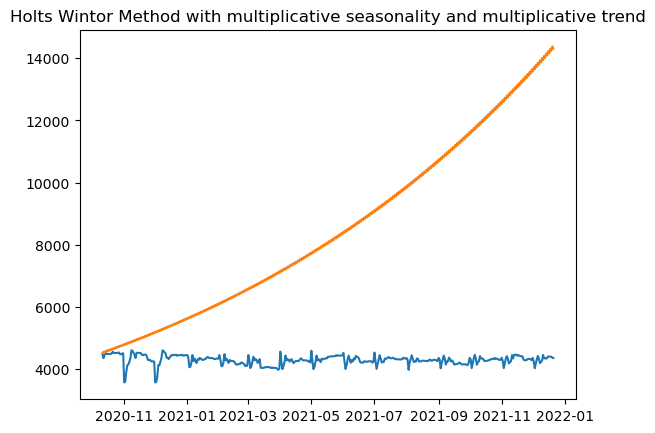

In [ ]:
ses_model = SimpleExpSmoothing(train_data['price']).fit(smoothing_level=0.1)
pred_ses = ses_model.predict(start=test_data['Dummpy_time'][0], end=test_data['Dummpy_time'][-1])
print('Simple Exponetial Smoothing')
print(MAPE(pred_ses, test_data['price']))
plt.plot(test_data['price'])
plt.plot(pred_ses)
plt.title('Simple Exponetial Smoothing')
plt.show()

hw_model = Holt(train_data['price']).fit(smoothing_level=0.6, smoothing_trend=0.6)
pred_hw = hw_model.predict(start=test_data['Dummpy_time'][0], end=test_data['Dummpy_time'][-1])
print(MAPE(pred_hw, test_data['price']))
print('Holts Method')
plt.plot(test_data['price'])
plt.plot(pred_hw)
plt.title('Holts Method')
plt.show()

hwe_add_model = ExponentialSmoothing(train_data['price'],seasonal='add',trend='add',seasonal_periods = 320).fit()
pred_hwe_add = hwe_add_model.predict(start=test_data['Dummpy_time'][0], end=test_data['Dummpy_time'][-1])
print(MAPE(pred_hwe_add, test_data['price']))
print('Holts Wintor Method with additive seasonality and additive trend')
plt.plot(test_data['price'])
plt.plot(pred_hwe_add)
plt.title('Holts Wintor Method with additive seasonality and additive trend')
plt.show()

hwe_mul_add_model = ExponentialSmoothing(train_data['price'],seasonal='add',trend='mul',seasonal_periods = 147).fit()
pred_hwe_mul_add = hwe_mul_add_model.predict(start=test_data['Dummpy_time'][0], end=test_data['Dummpy_time'][-1])
print(MAPE(pred_hwe_mul_add, test_data['price']))
print('Holts Wintor Method with multiplicative seasonality and additive trend')
plt.plot(test_data['price'])
plt.plot(pred_hwe_mul_add)
plt.title('Holts Wintor Method with additive seasonality and additive trend')
plt.show()

hwe_mul_mul_model = ExponentialSmoothing(train_data['price'],seasonal='mul',trend='mul',seasonal_periods = 2).fit()
pred_hwe_mul_mul = hwe_mul_mul_model.predict(start=test_data['Dummpy_time'][0], end=test_data['Dummpy_time'][-1])
print('Holts Wintor Method with multiplicative seasonality and multiplicative trend')
print(MAPE(pred_hwe_mul_mul, test_data['price']))
plt.plot(test_data['price'])
plt.plot(pred_hwe_mul_mul)
plt.title('Holts Wintor Method with multiplicative seasonality and multiplicative trend')
plt.show()